In [51]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [52]:
total_data = pd.read_pickle('./data/total_prepared_2_drop_dupli')
total_data_raw = pd.read_pickle('./data/total_data_raw')

In [53]:
total_data.head()

ID       age  failures  absences        G1        G2        G3  \
0   0  0.936192 -0.464478  0.156064 -1.859911 -1.335006 -1.151436   
1   1  0.147694 -0.464478 -0.135784 -1.859911 -1.618539 -1.151436   
2   2 -1.429301  3.728494  0.739760 -1.210512 -0.767939 -0.176691   
3   3 -1.429301 -0.464478 -0.427633  1.387085  0.933262  1.041741   
4   4 -0.640803 -0.464478 -0.135784 -1.535211 -0.200872 -0.176691   

   score_average  traveltime  studytime     ...       Fjob_services  \
0      -1.489430    0.333333   0.333333     ...                   0   
1      -1.587667    0.000000   0.333333     ...                   0   
2      -0.703536    0.000000   0.333333     ...                   0   
3       1.162963    0.000000   0.666667     ...                   1   
4      -0.605299    0.000000   0.333333     ...                   0   

   Fjob_teacher  reason_course  reason_home  reason_other  reason_reputation  \
0             1              1            0             0                  0   
1             0              1            0             0                  0   
2             0              0            0             1                  0   
3             0              0            1             0                  0   
4             0              0            1             0                  0   

   guardian_father  guardian_mother  guardian_other  alc_average  
0                0                1               0     1.000000  
1                1                0               0     1.000000  
2                0                1               0     2.285714  
3                0                1               0     1.000000  
4                1                0               0     1.285714  

[5 rows x 50 columns]

In [54]:
total_data_raw.head()

ID school sex  age address famsize Pstatus  Medu  Fedu     Mjob  \
0   0     GP   F   18       U     GT3       A     4     4  at_home   
1   1     GP   F   17       U     GT3       T     1     1  at_home   
2   2     GP   F   15       U     LE3       T     1     1  at_home   
3   3     GP   F   15       U     GT3       T     4     2   health   
4   4     GP   F   16       U     GT3       T     3     3    other   

      ...     health absences  G1  G2  G3  subject alc_total alc_average  \
0     ...          3        6   5   6   6        M         7    1.000000   
1     ...          3        4   5   5   6        M         7    1.000000   
2     ...          3       10   7   8  10        M        16    2.285714   
3     ...          5        2  15  14  15        M         7    1.000000   
4     ...          5        4   6  10  10        M         9    1.285714   

  score_average score_total  
0      5.666667          17  
1      5.333333          16  
2      8.333333          25  
3     14.666667          44  
4      8.666667          26  

[5 rows x 39 columns]

In [55]:
total_data.columns

Index(['ID', 'age', 'failures', 'absences', 'G1', 'G2', 'G3', 'score_average',
       'traveltime', 'studytime', 'famrel', 'freetime', 'goout', 'Dalc',
       'Walc', 'health', 'school', 'sex', 'address', 'famsize', 'Pstatus',
       'schoolsup', 'famsup', 'paid', 'activities', 'nursery', 'higher',
       'internet', 'romantic', 'subject', 'Medu', 'Fedu', 'Mjob_at_home',
       'Mjob_health', 'Mjob_other', 'Mjob_services', 'Mjob_teacher',
       'Fjob_at_home', 'Fjob_health', 'Fjob_other', 'Fjob_services',
       'Fjob_teacher', 'reason_course', 'reason_home', 'reason_other',
       'reason_reputation', 'guardian_father', 'guardian_mother',
       'guardian_other', 'alc_average'],
      dtype='object')

In [56]:
drop_column_list = ['Dalc','Walc']

In [57]:
def dropping_columns(data=None, columns = None):
    
    dropped_data = data.drop(columns, axis=1)
    
    return dropped_data

In [58]:
total_data_drop = dropping_columns(data = total_data, columns= drop_column_list)
total_data_raw_drop = dropping_columns(data = total_data_raw, columns= drop_column_list)

In [59]:
from sklearn.preprocessing import LabelBinarizer

In [60]:
def seperate_target(data=None, threshold=None, K = None):
    le = LabelBinarizer()
    data_1 = data.copy()
    data_1['alc_average'] = data_1['alc_average'].round(0)
    
    if K is None:
        data_1['alc_average'] = ((data_1['alc_average'] > threshold).replace({True : 1, False : 0})).astype('int')
        return data_1
    
    elif K is not  None:
        if K==5:
#             data_1['alc_average'] = (data_1['alc_average']).replace({1 : 0 , 2 : 0, 3: 0 , 4: 0, 5: 1})
            data_1['alc_average'] = (data_1['alc_average']).astype('int')
            return data_1
        elif K==4:
            data_1['alc_average'] = ((data_1['alc_average']).replace({1 : 1 , 2 : 2, 3: 3  , 4: 4, 5: 4})).astype('int')
            return data_1
        elif K==3:
            data_1['alc_average'] = (data_1['alc_average']).replace({1 : 1 , 2 : 2, 3: 2 , 4: 3, 5: 3}).astype('int')
            return data_1

In [61]:
total_data_drop = seperate_target(total_data_drop, 1)
total_data_drop = seperate_target(total_data_drop, 2)

total_data_raw_drop_1 = seperate_target(total_data_raw_drop, 1)
total_data_raw_drop_2 = seperate_target(total_data_raw_drop, 2)

# Plot을 그려보장!

## Total data 쓰레스 홀드 1케이스 Plot

In [62]:
total_data_raw_drop_1.head()

ID school sex  age address famsize Pstatus  Medu  Fedu     Mjob  \
0   0     GP   F   18       U     GT3       A     4     4  at_home   
1   1     GP   F   17       U     GT3       T     1     1  at_home   
2   2     GP   F   15       U     LE3       T     1     1  at_home   
3   3     GP   F   15       U     GT3       T     4     2   health   
4   4     GP   F   16       U     GT3       T     3     3    other   

      ...     health absences  G1  G2  G3  subject alc_total alc_average  \
0     ...          3        6   5   6   6        M         7           0   
1     ...          3        4   5   5   6        M         7           0   
2     ...          3       10   7   8  10        M        16           1   
3     ...          5        2  15  14  15        M         7           0   
4     ...          5        4   6  10  10        M         9           0   

  score_average score_total  
0      5.666667          17  
1      5.333333          16  
2      8.333333          25  
3     14.666667          44  
4      8.666667          26  

[5 rows x 37 columns]

In [65]:
total_data_raw_drop_1.drop(['alc_total','score_total'],inplace=True,axis=1)
total_data_raw_drop_2.drop(['alc_total','score_total'],inplace=True,axis=1)

In [72]:
total_data_raw_drop_1.rename(columns={"alc_average": 'alc_monitor_target'},inplace=True)
total_data_raw_drop_2.rename(columns={"alc_average": 'alc_monitor_target'},inplace=True)

In [74]:
total_data_raw_drop_1.head()

ID school sex  age address famsize Pstatus  Medu  Fedu     Mjob  \
0   0     GP   F   18       U     GT3       A     4     4  at_home   
1   1     GP   F   17       U     GT3       T     1     1  at_home   
2   2     GP   F   15       U     LE3       T     1     1  at_home   
3   3     GP   F   15       U     GT3       T     4     2   health   
4   4     GP   F   16       U     GT3       T     3     3    other   

       ...      freetime goout health  absences  G1  G2  G3 subject  \
0      ...             3     4      3         6   5   6   6       M   
1      ...             3     3      3         4   5   5   6       M   
2      ...             3     2      3        10   7   8  10       M   
3      ...             2     2      5         2  15  14  15       M   
4      ...             3     2      5         4   6  10  10       M   

  alc_monitor_target score_average  
0                  0      5.666667  
1                  0      5.333333  
2                  1      8.333333  
3                  0     14.666667  
4                  0      8.666667  

[5 rows x 35 columns]

In [125]:
total_data_raw_drop_1.columns

Index(['ID', 'school', 'sex', 'age', 'address', 'famsize', 'Pstatus', 'Medu',
       'Fedu', 'Mjob', 'Fjob', 'reason', 'guardian', 'traveltime', 'studytime',
       'failures', 'schoolsup', 'famsup', 'paid', 'activities', 'nursery',
       'higher', 'internet', 'romantic', 'famrel', 'freetime', 'goout',
       'health', 'absences', 'G1', 'G2', 'G3', 'subject', 'alc_monitor_target',
       'score_average'],
      dtype='object')

In [115]:
def target_plot(filename):
    data = eval(filename)
#      plt.rcParams.update({'font.size': 22})
    f,ax=plt.subplots(1,2,figsize=(18,8))
    
    data['alc_monitor_target'].value_counts().plot.pie(explode=[0,0.1],autopct='%1.1f%%',ax=ax[0],shadow=True)
    ax[0].set_title('Monitor target count')
    ax[0].set_ylabel('')
    sns.countplot('alc_monitor_target',data=data,ax=ax[1])
    ax[1].set_title('Monitor target count')
    plt.savefig((filename + 'target_plot_1'), dpi=300)
    plt.show()
#     return plt

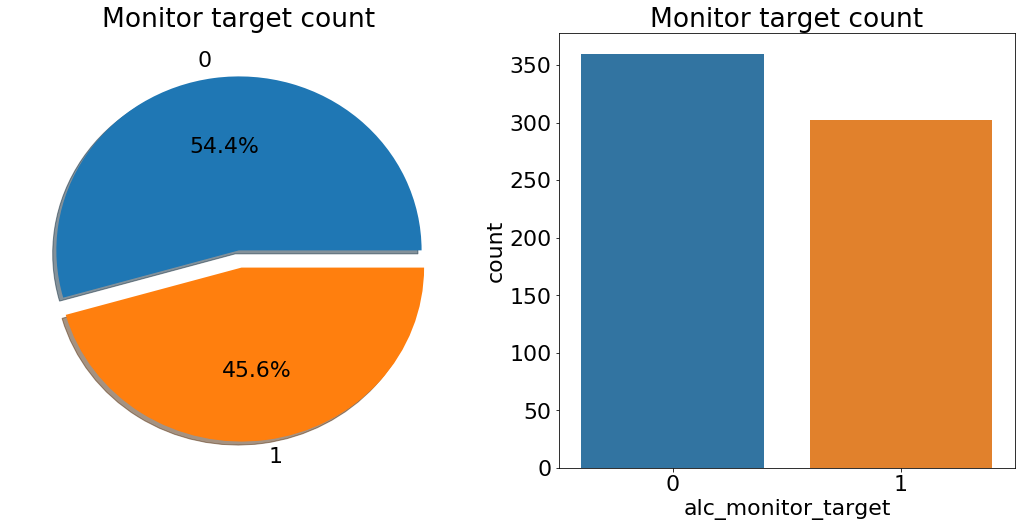

In [116]:
target_plot('total_data_raw_drop_1')

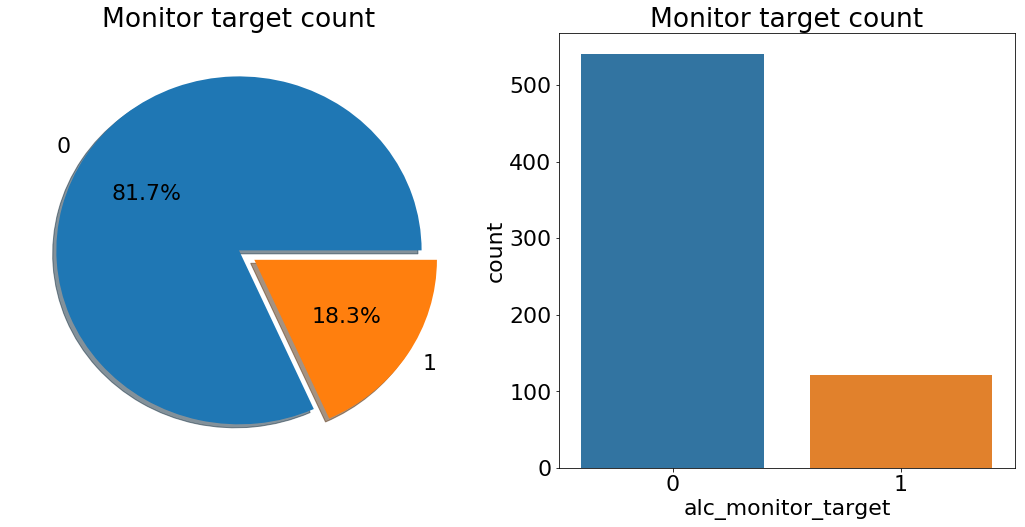

In [117]:
target_plot('total_data_raw_drop_2')

In [136]:
def object_target_barplot(filename, object_name=None ):
    data = eval(filename)
#      plt.rcParams.update({'font.size': 22})
    f,ax=plt.subplots(1,2,figsize=(18,8))
    data[[object_name,'alc_monitor_target']].groupby([object_name]).mean().plot.bar(ax=ax[0])
    ax[0].set_title('Monitored vs '+ object_name)
    sns.countplot(object_name, hue='alc_monitor_target',data=data,ax=ax[1])
    ax[1].set_title(object_name+' :alc_monitor_target')
    plt.savefig((filename +object_name+ '_target_barplot'), dpi=300)
    plt.show()
#     return plt

In [140]:
binary_list = ['school','sex','address', 'famsize', 'Pstatus',  'schoolsup', 'famsup', 'paid' ,'activities', 'nursery', 'higher',
              'internet', 'romantic']

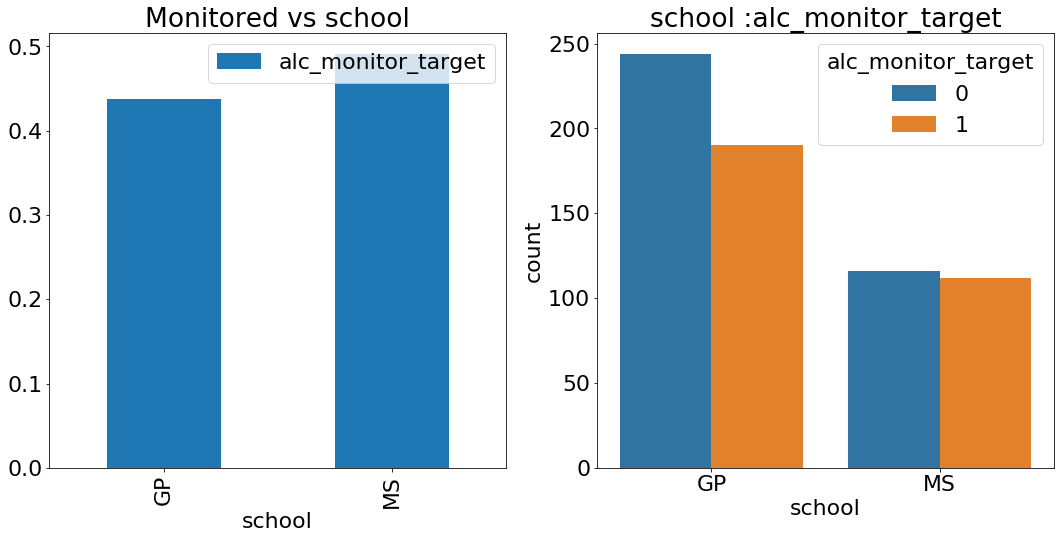

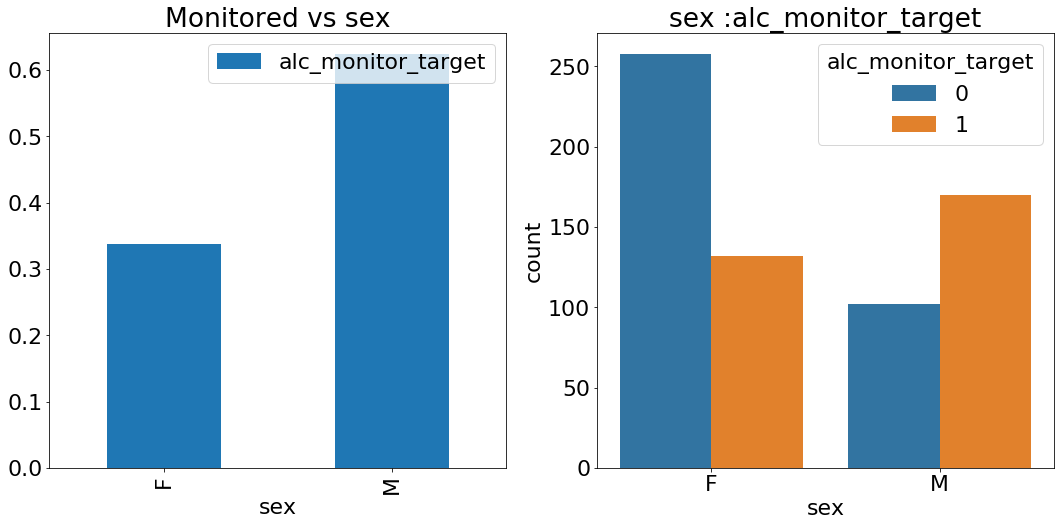

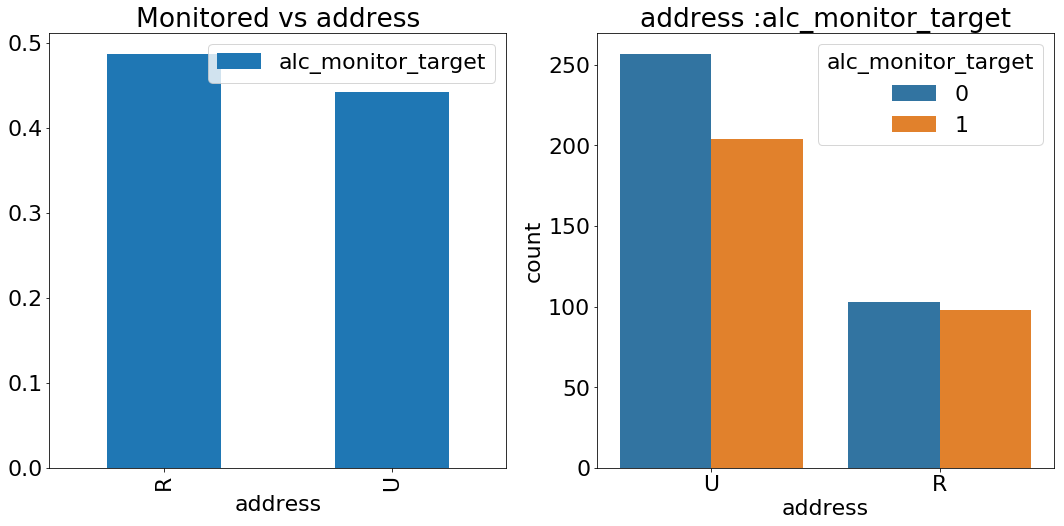

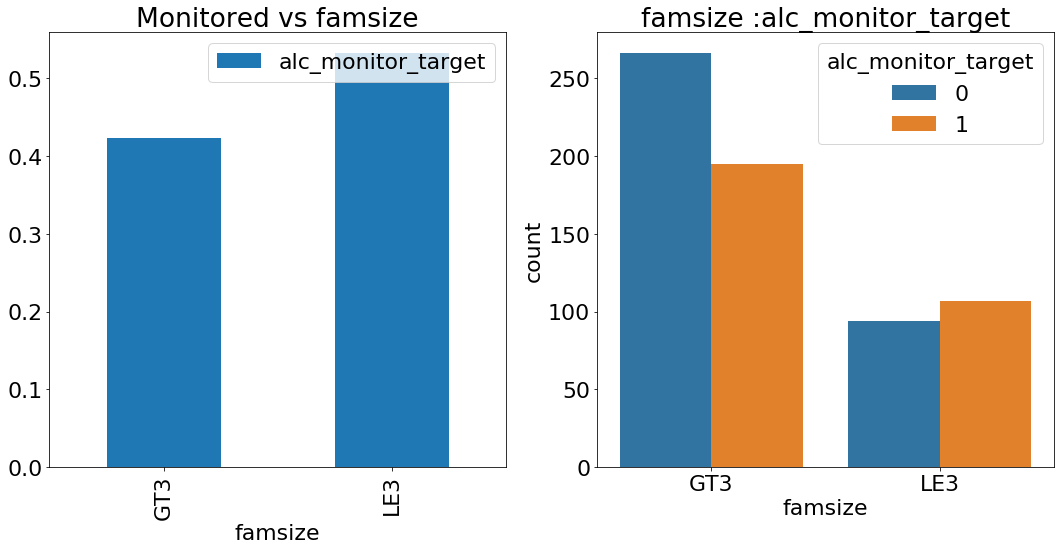

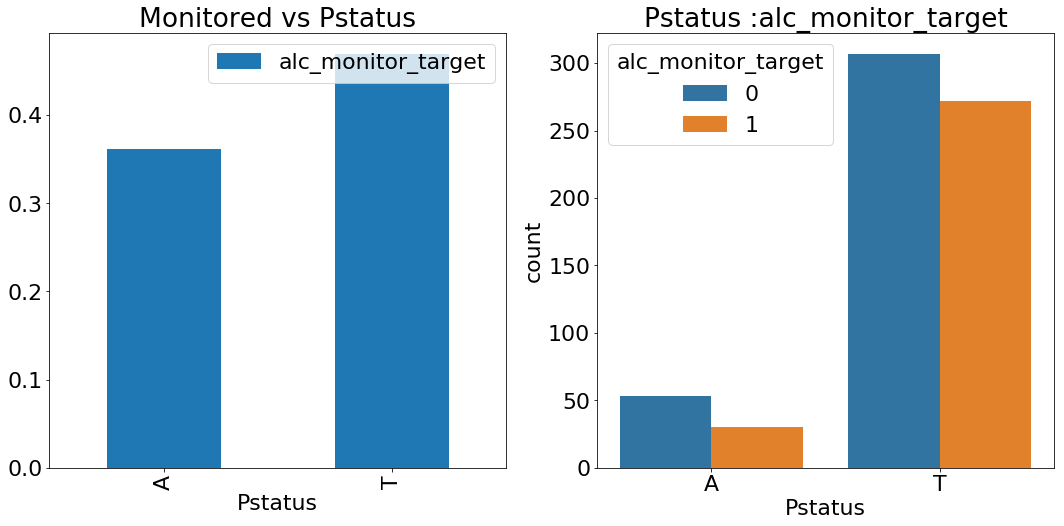

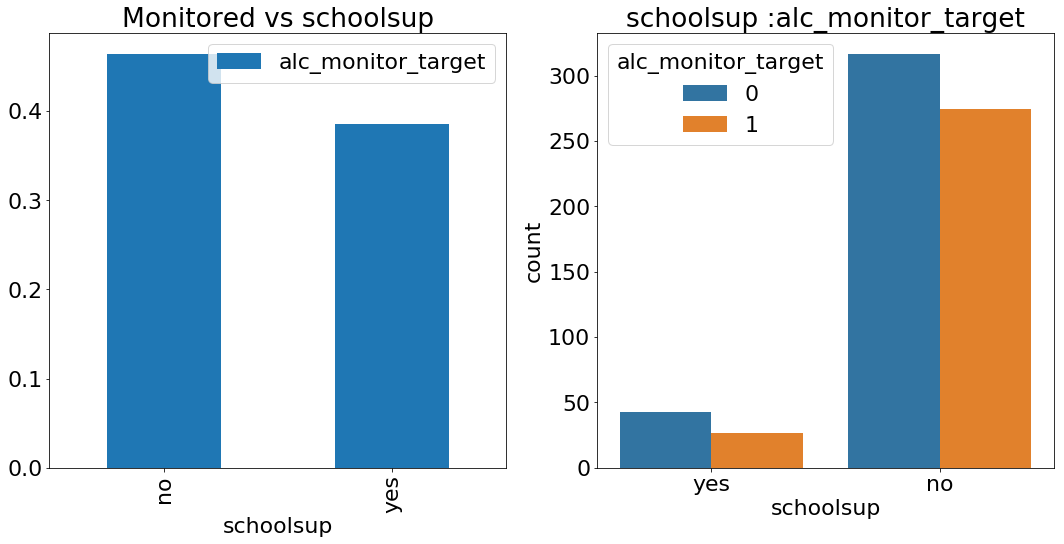

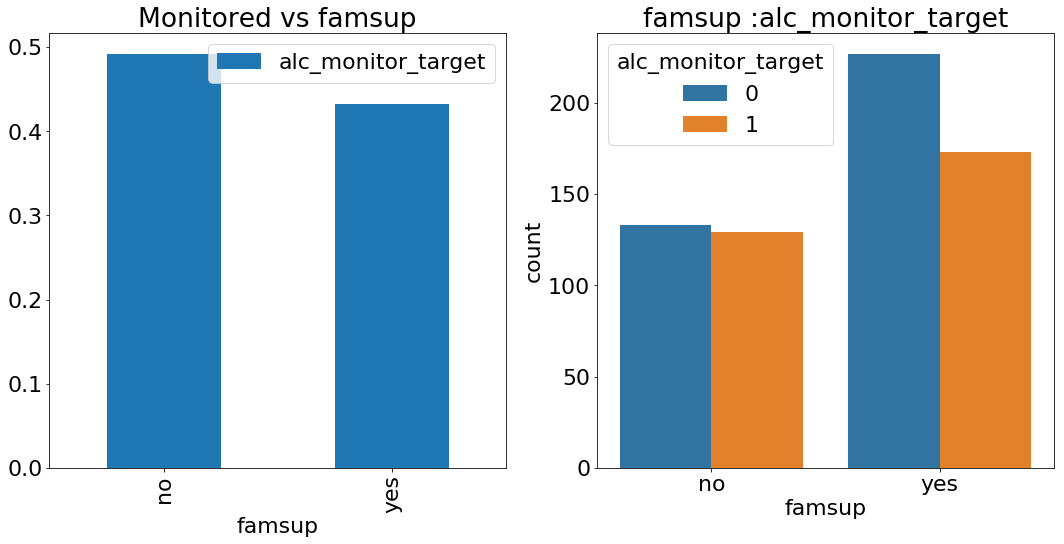

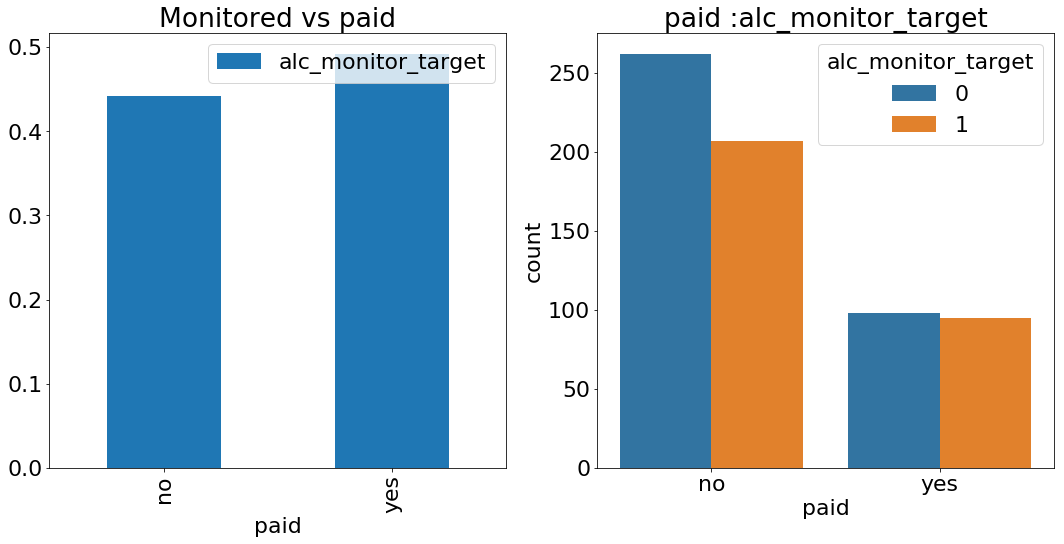

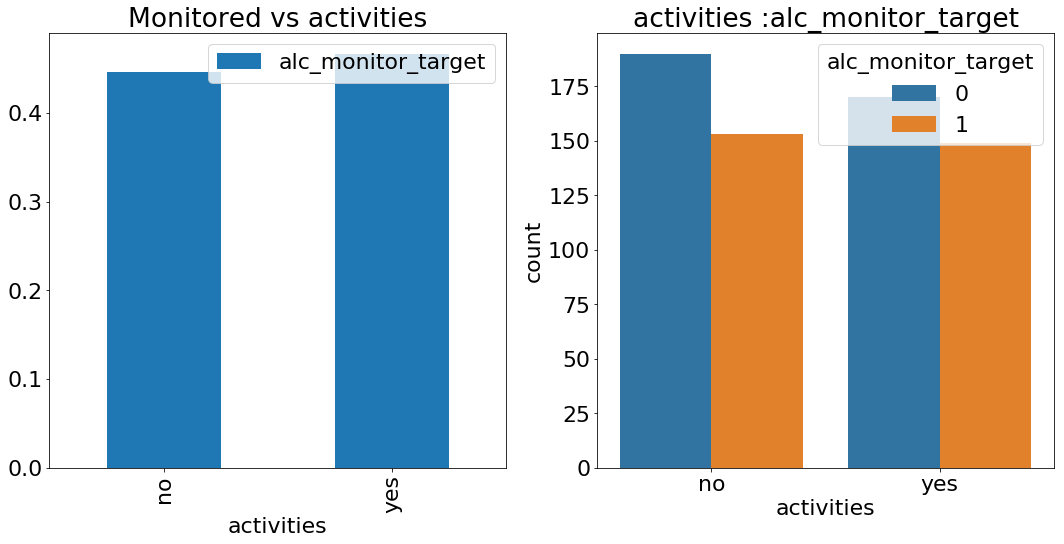

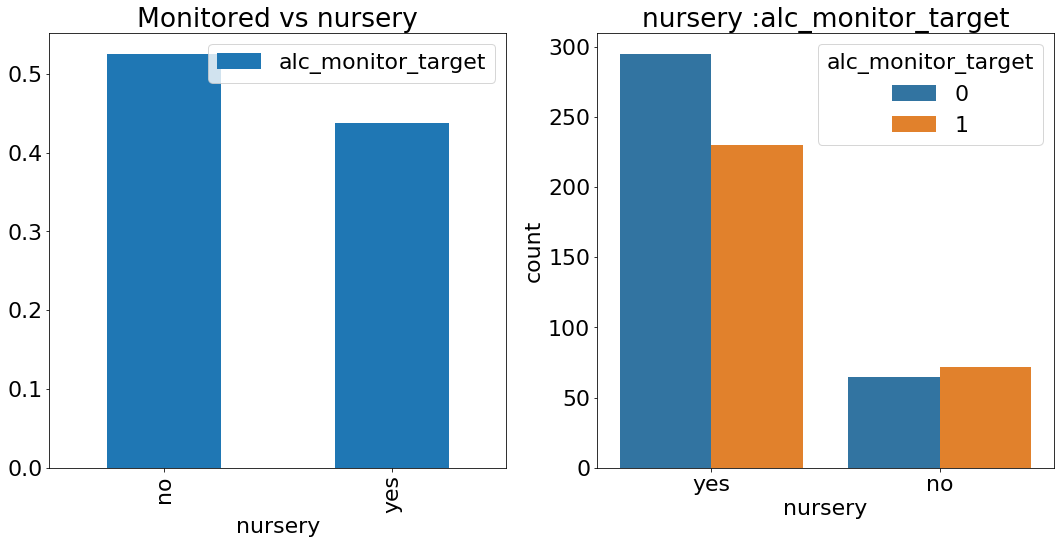

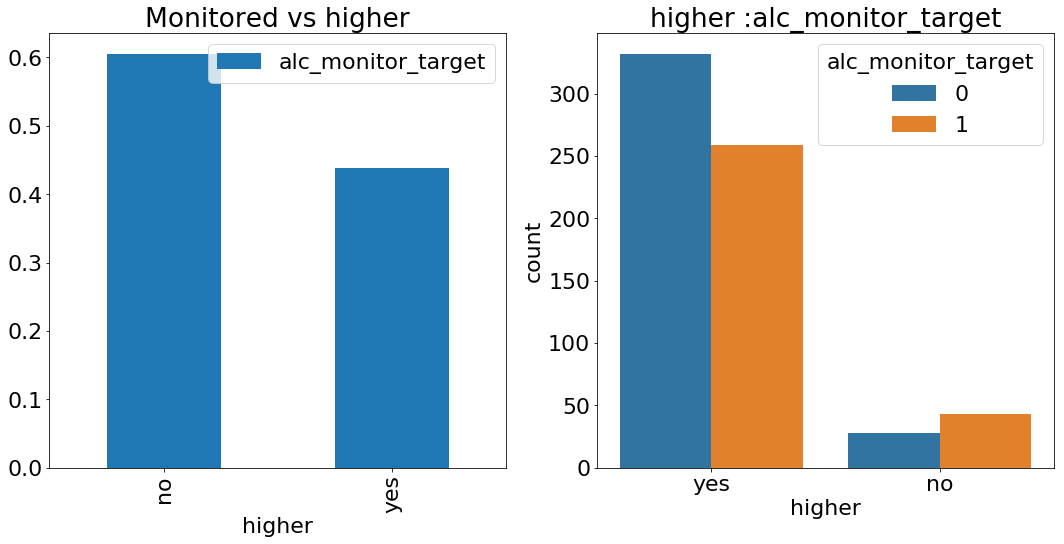

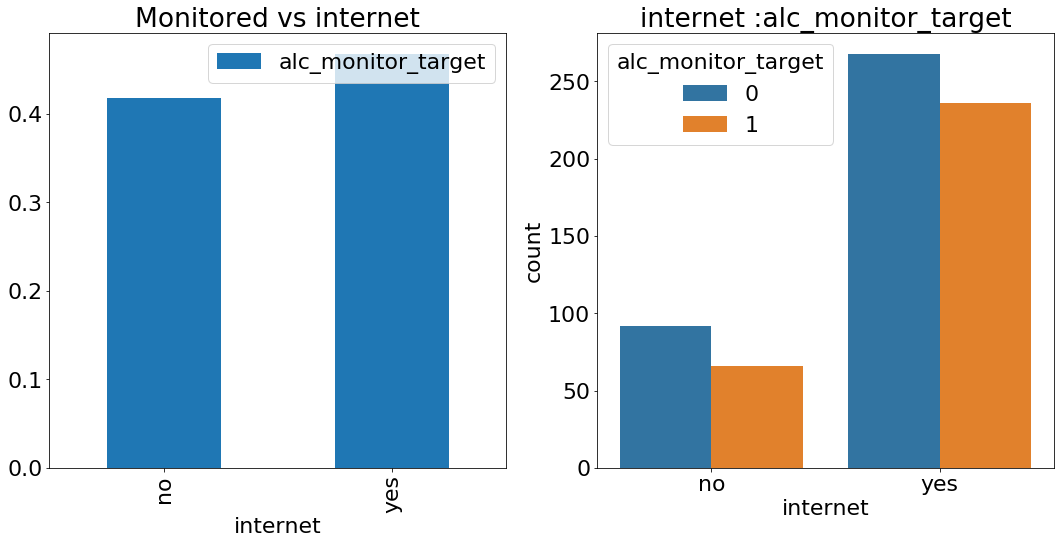

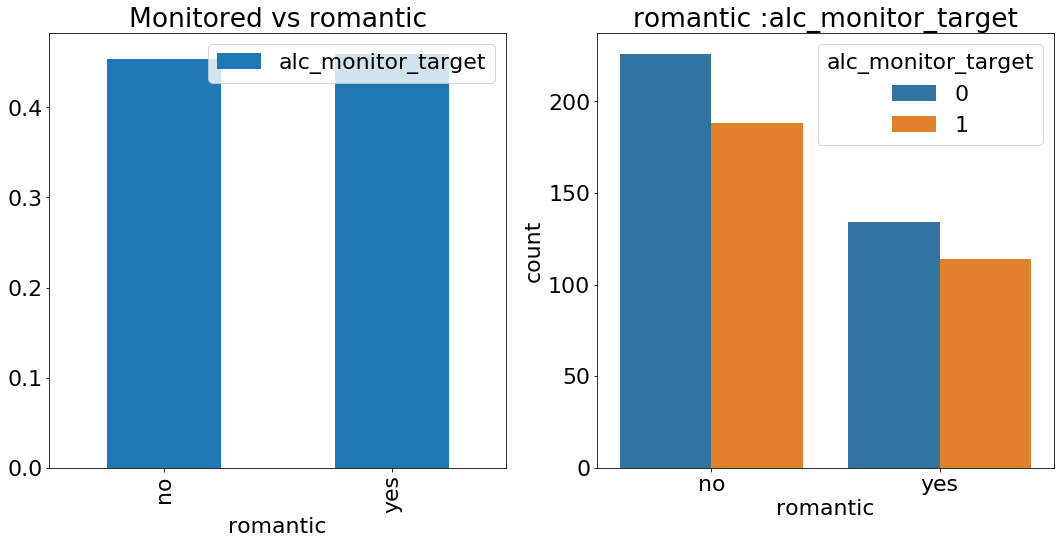

In [141]:
for bin_list in binary_list:
    object_target_barplot('total_data_raw_drop_1', object_name=bin_list)

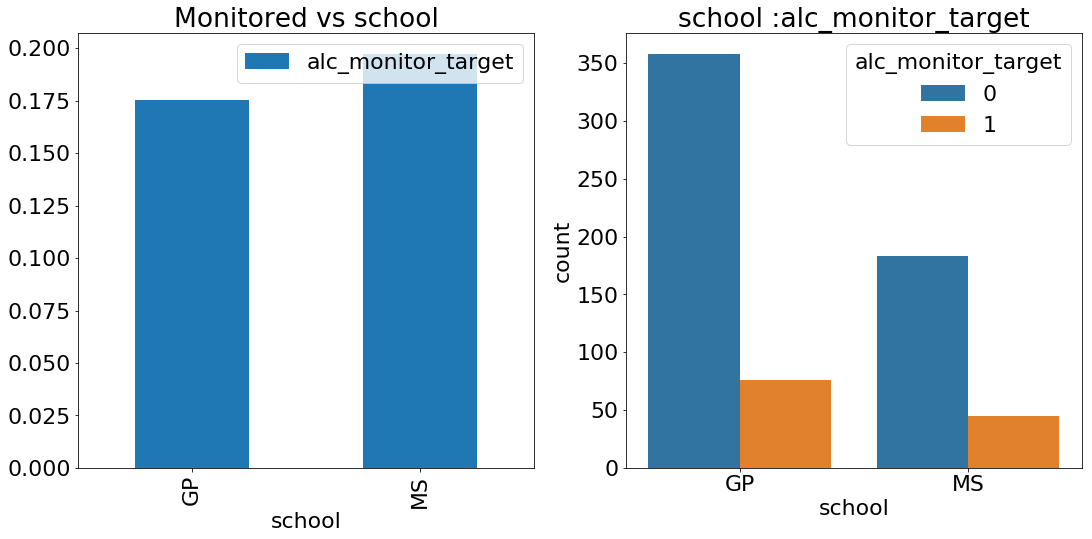

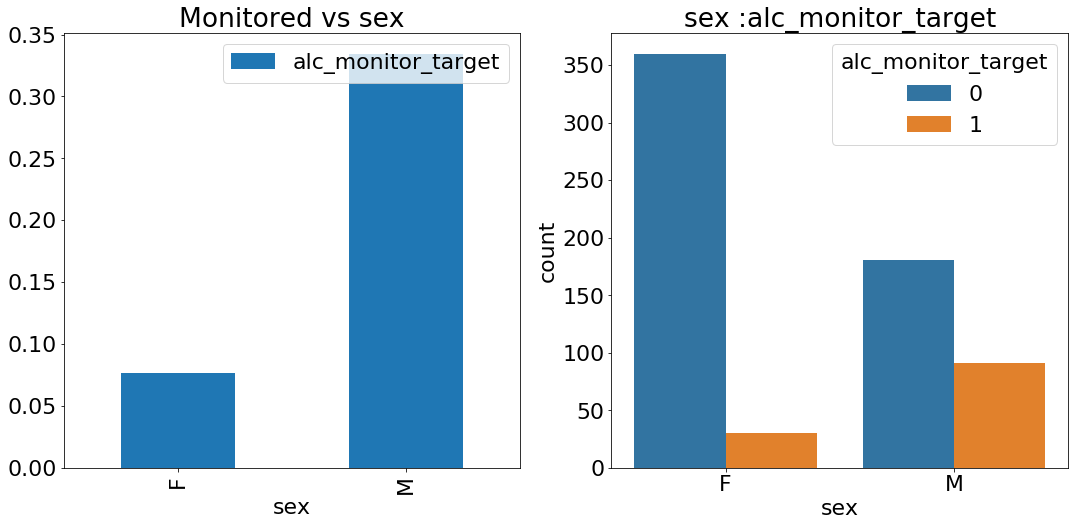

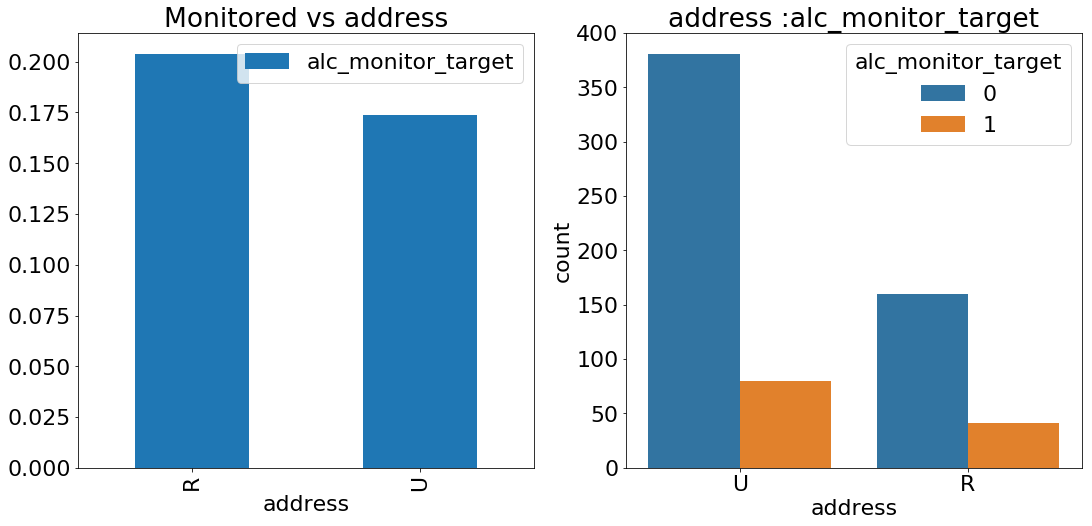

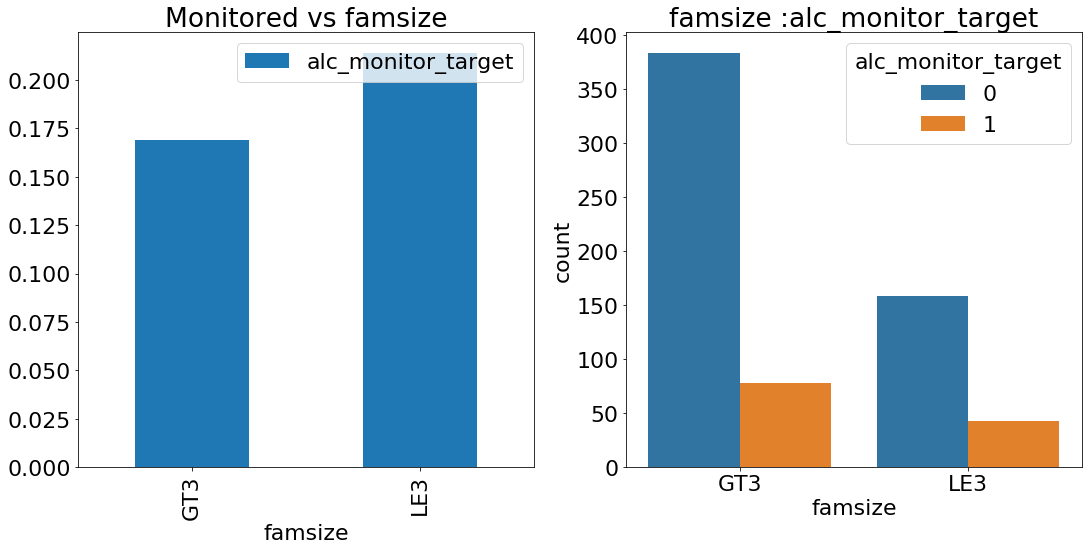

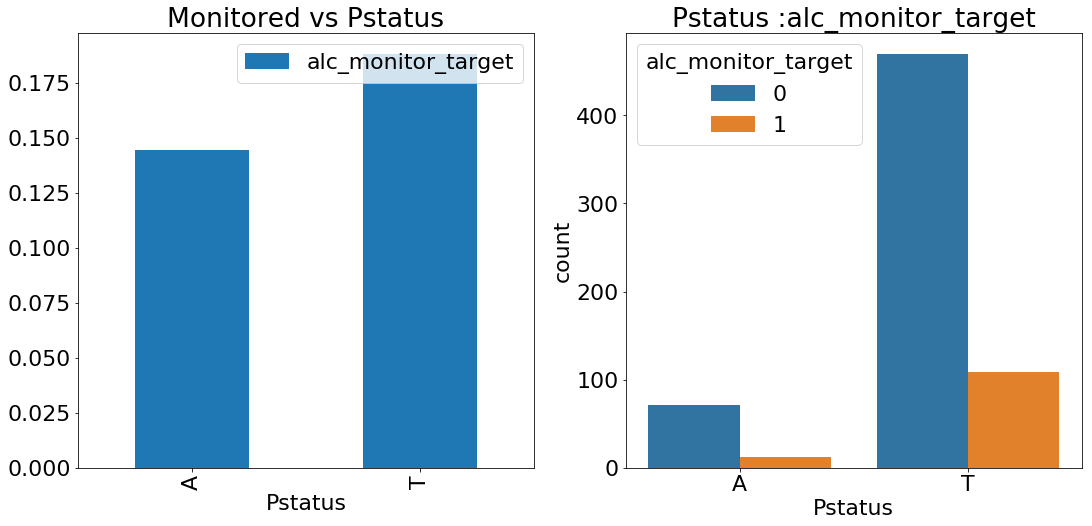

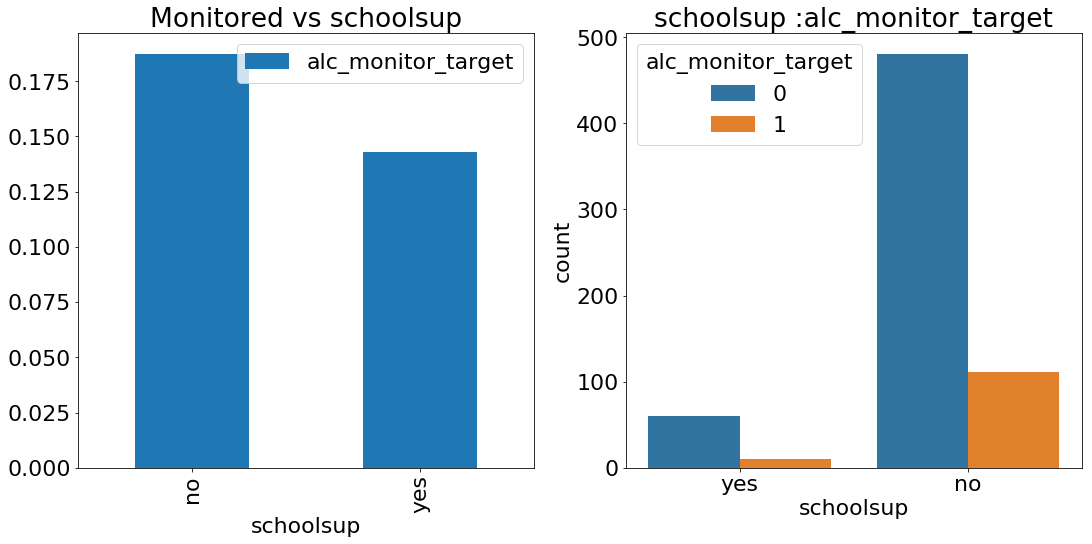

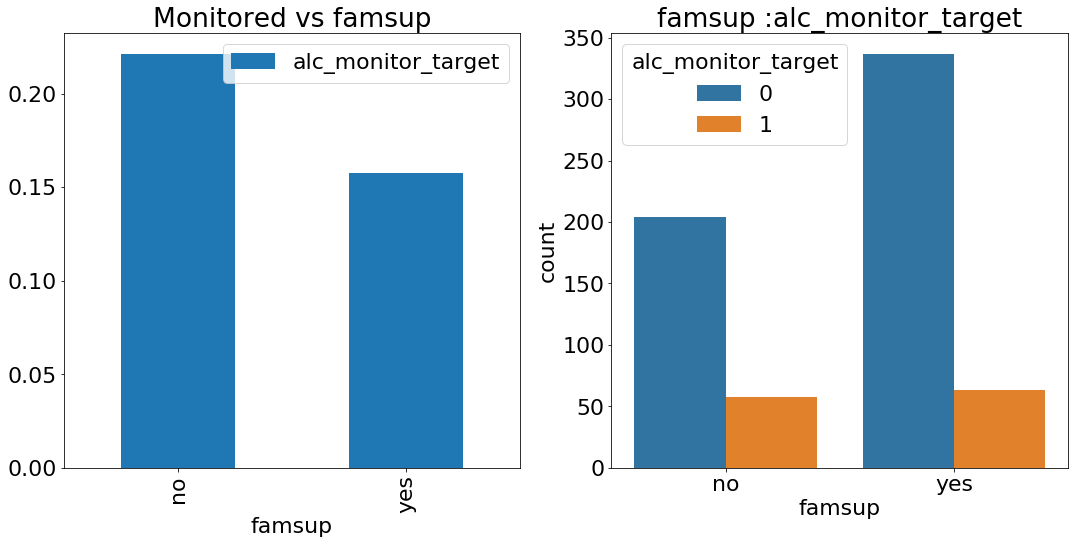

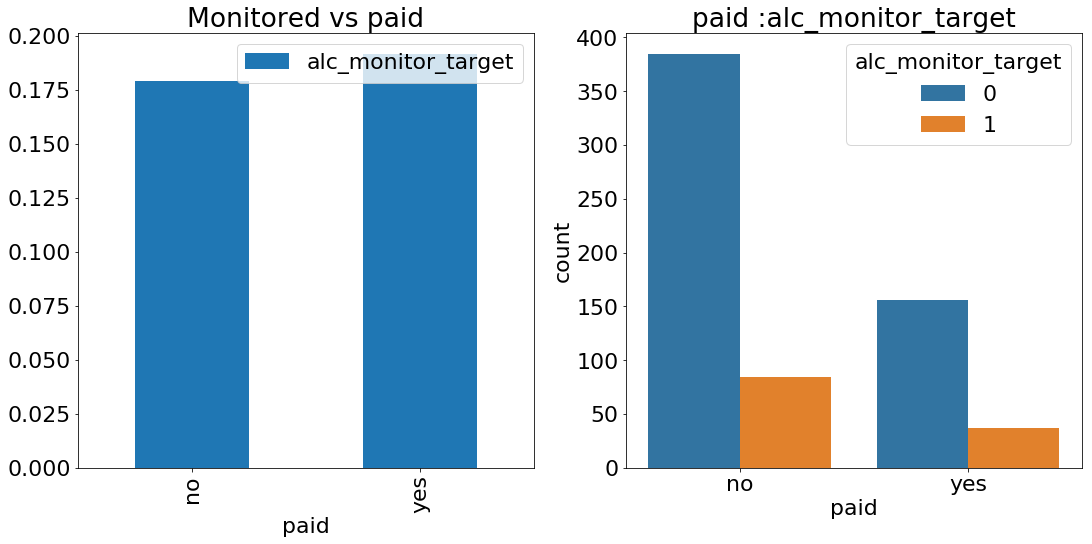

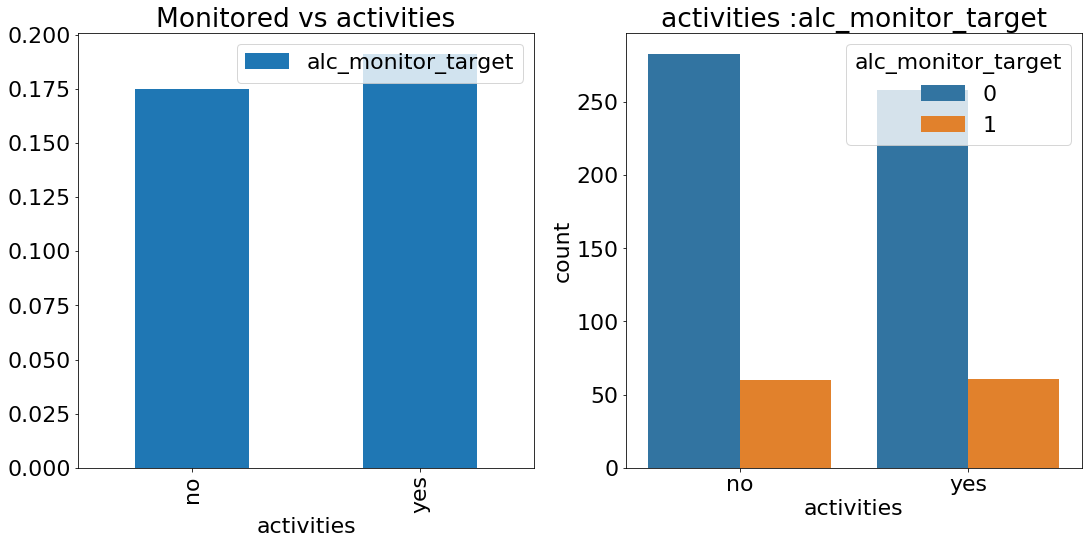

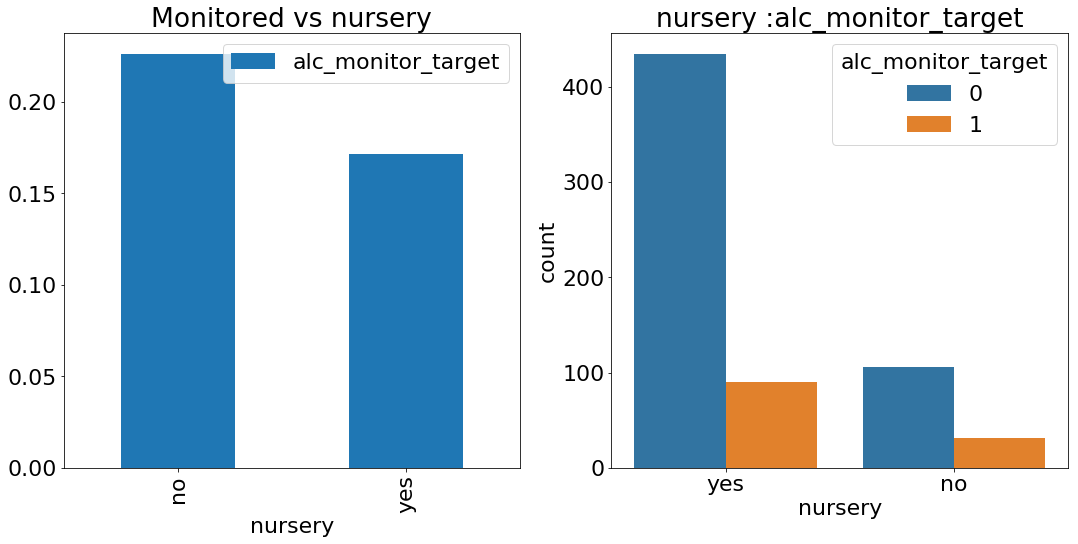

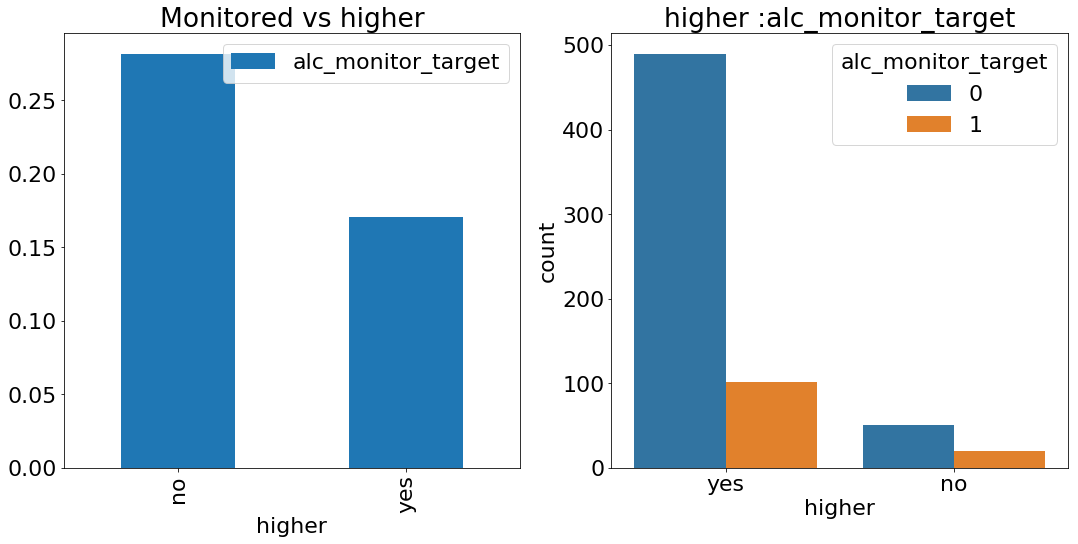

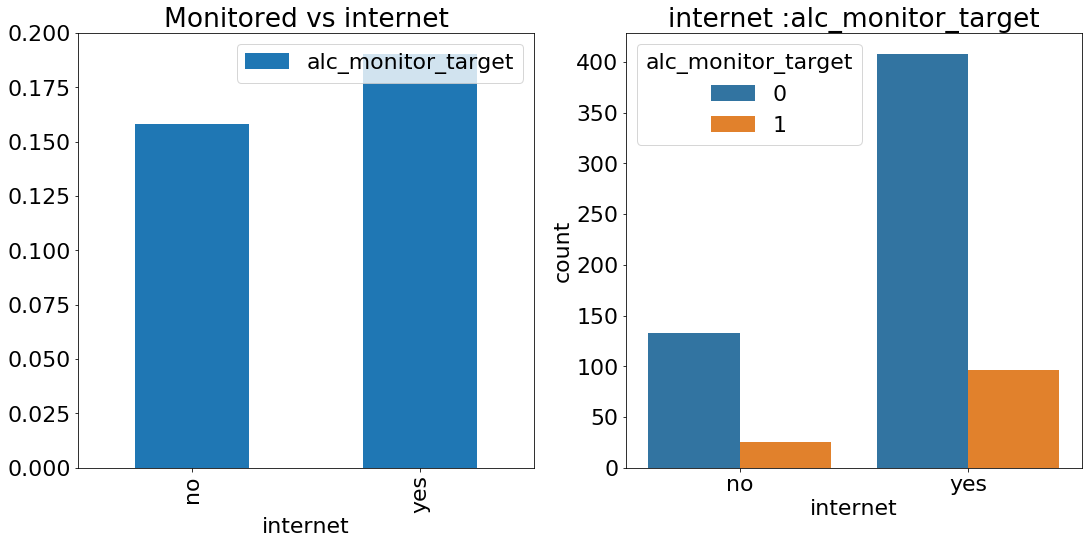

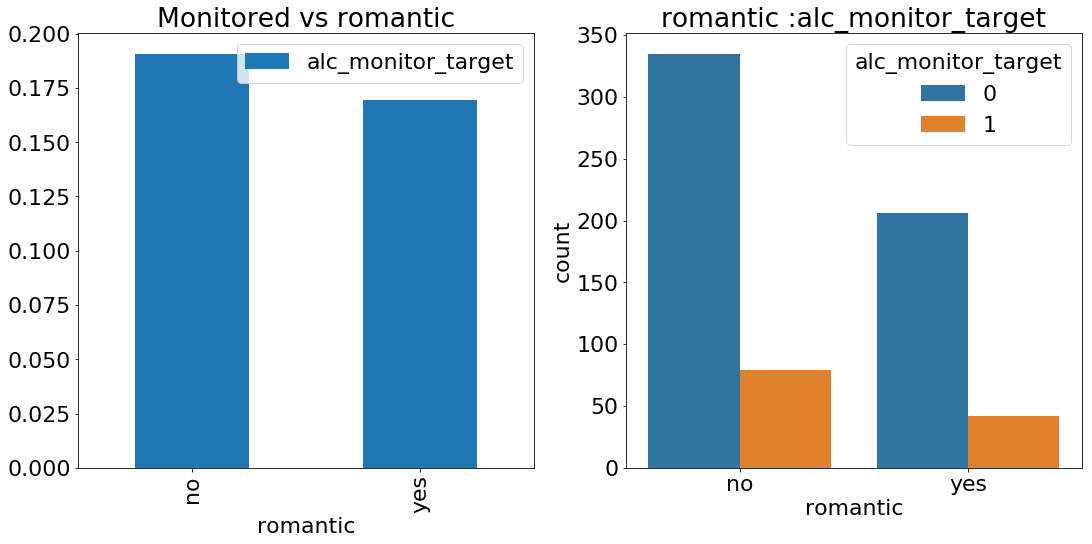

In [142]:
for bin_list in binary_list:
    object_target_barplot('total_data_raw_drop_2', object_name=bin_list)

In [145]:
def multi_cat_target_plot(filename,object_name=None):
    data = eval(filename)
#      plt.rcParams.update({'font.size': 22})
    f,ax=plt.subplots(1,2,figsize=(18,8))
    data[object_name].value_counts().plot.bar(ax=ax[0]) #color=['#CD7F32','#FFDF00','#D3D3D3'],
    ax[0].set_title('Number Of Targets'+ ' By '+ object_name)
    ax[0].set_ylabel('Count')
    sns.countplot(object_name,hue='alc_monitor_target',data=data,ax=ax[1])
    ax[1].set_title(object_name + ' :Target vs None')
    plt.savefig((filename + object_name + '_target_multi_barplot'), dpi=300)
    plt.show()
#     return plt

In [148]:
total_data_raw_drop_1['Medu'].value_counts()

2    190
4    172
1    150
3    144
0      6
Name: Medu, dtype: int64

In [146]:
cat_list = ['Medu', 'Fedu', 'Mjob', 'Fjob', 'reason', 'guardian']

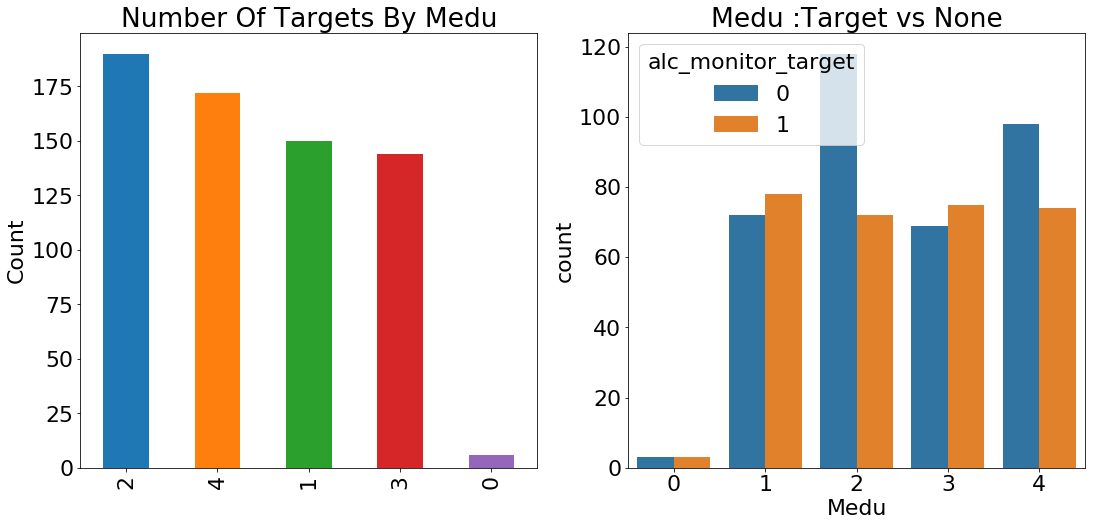

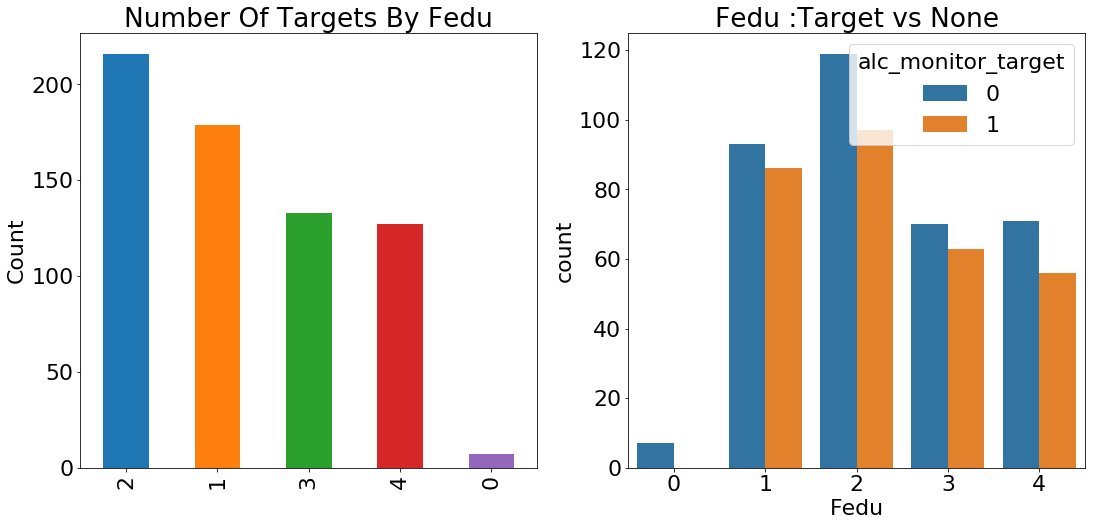

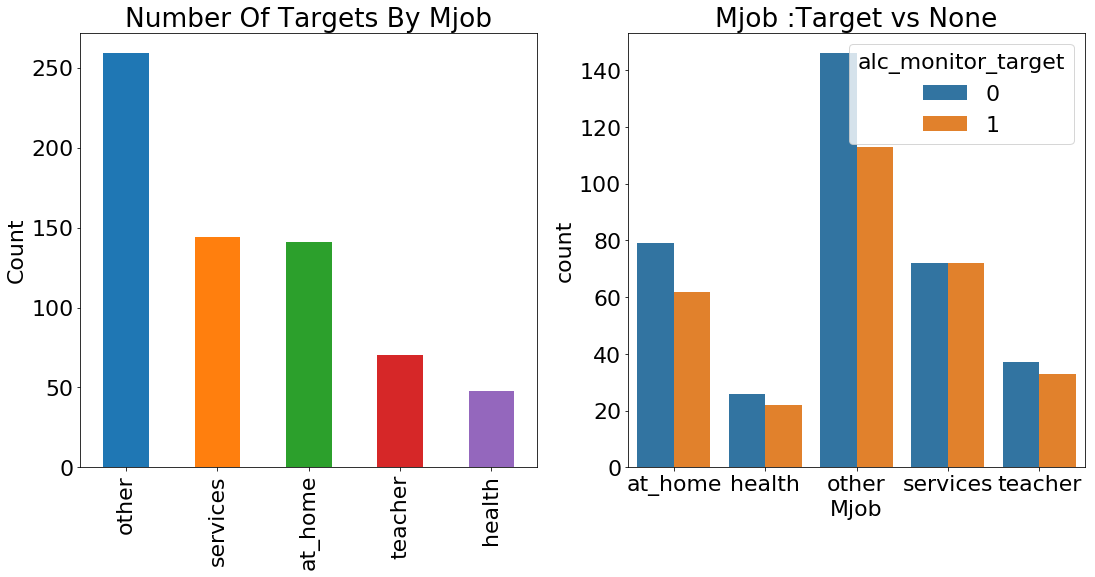

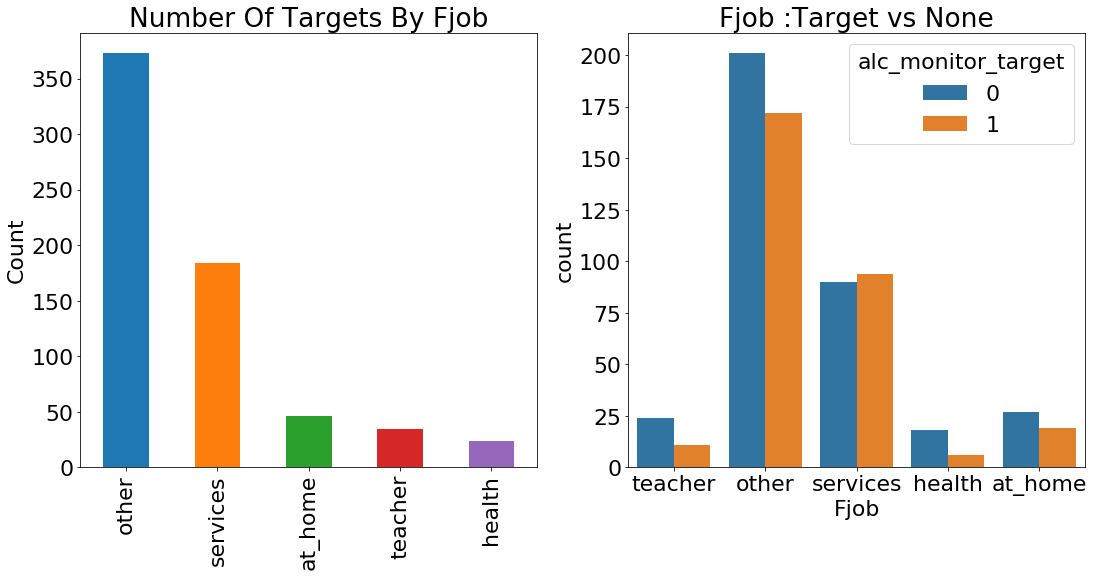

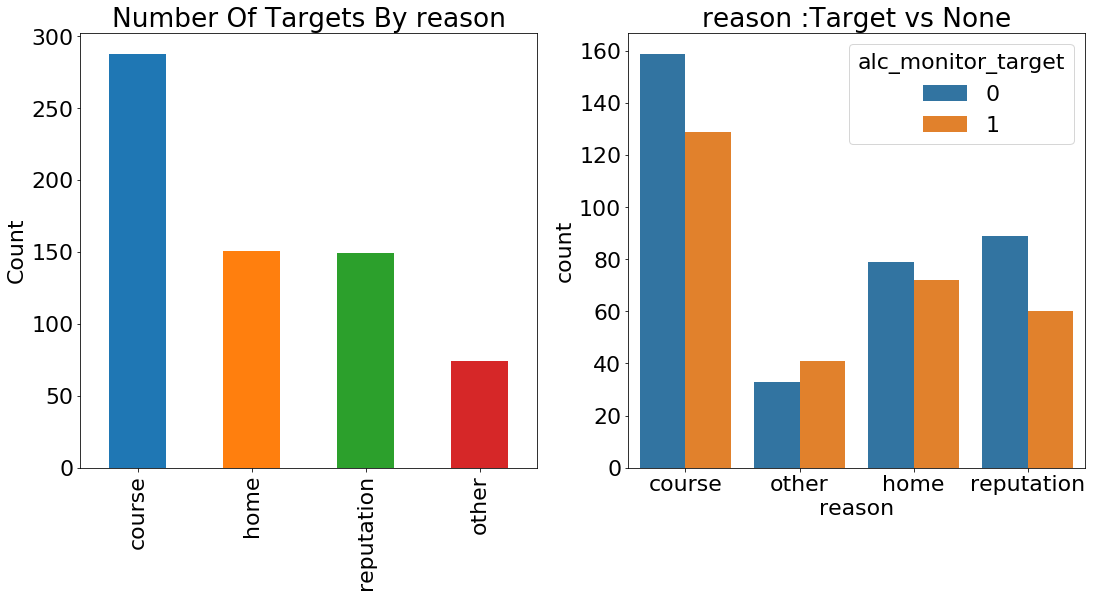

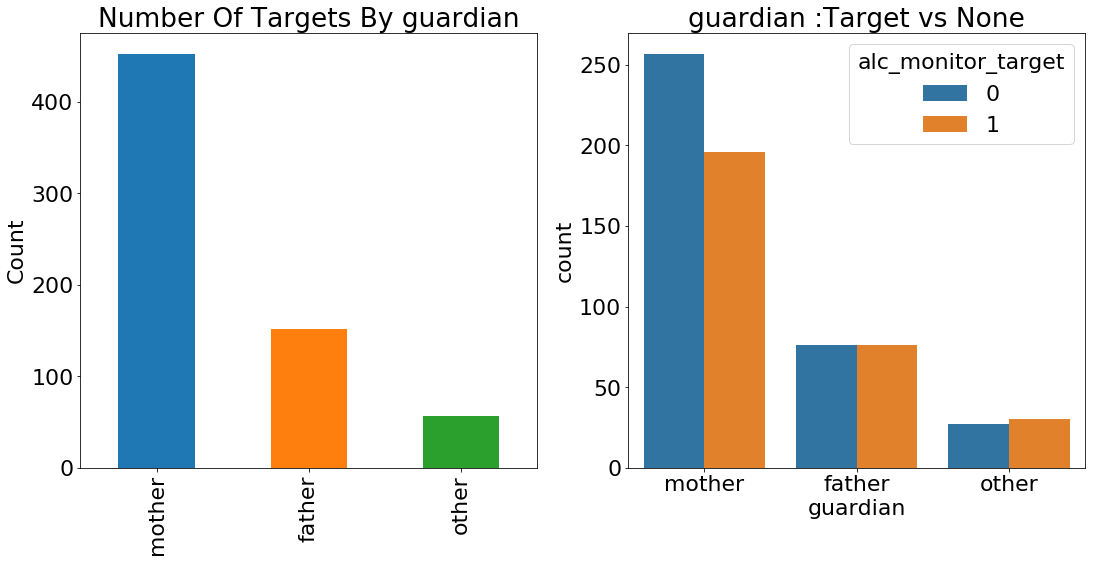

In [150]:
for i in cat_list:
    multi_cat_target_plot('total_data_raw_drop_1', object_name=i)

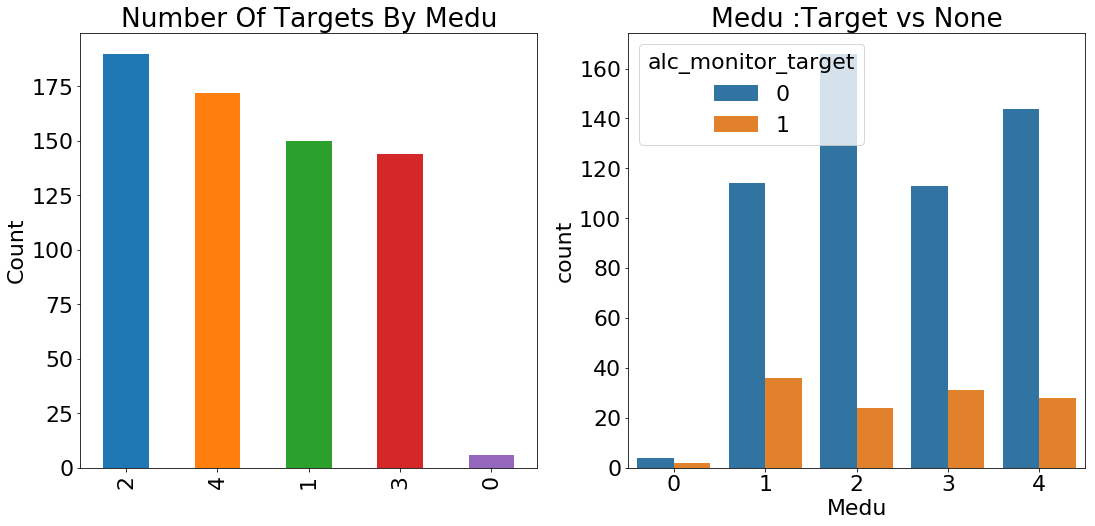

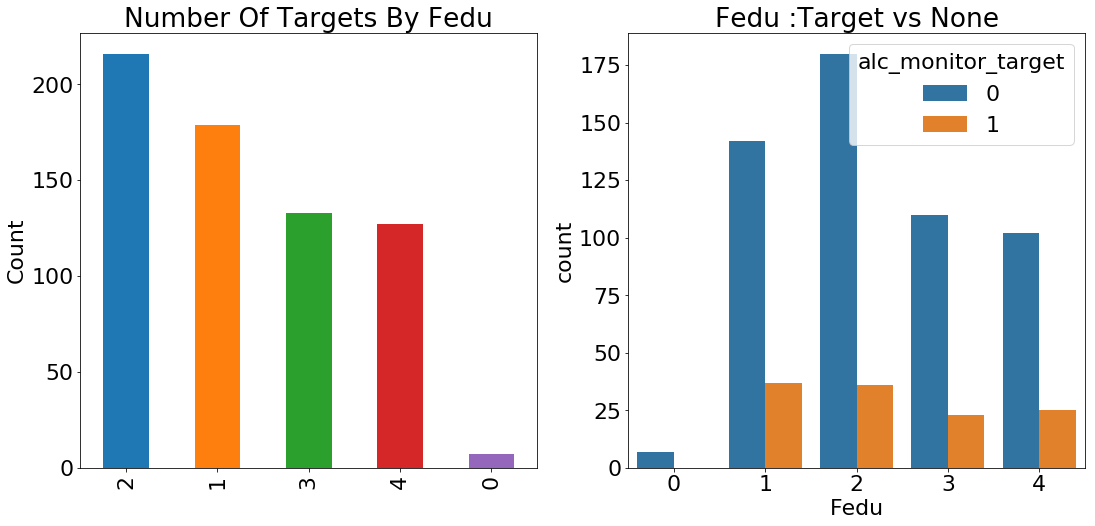

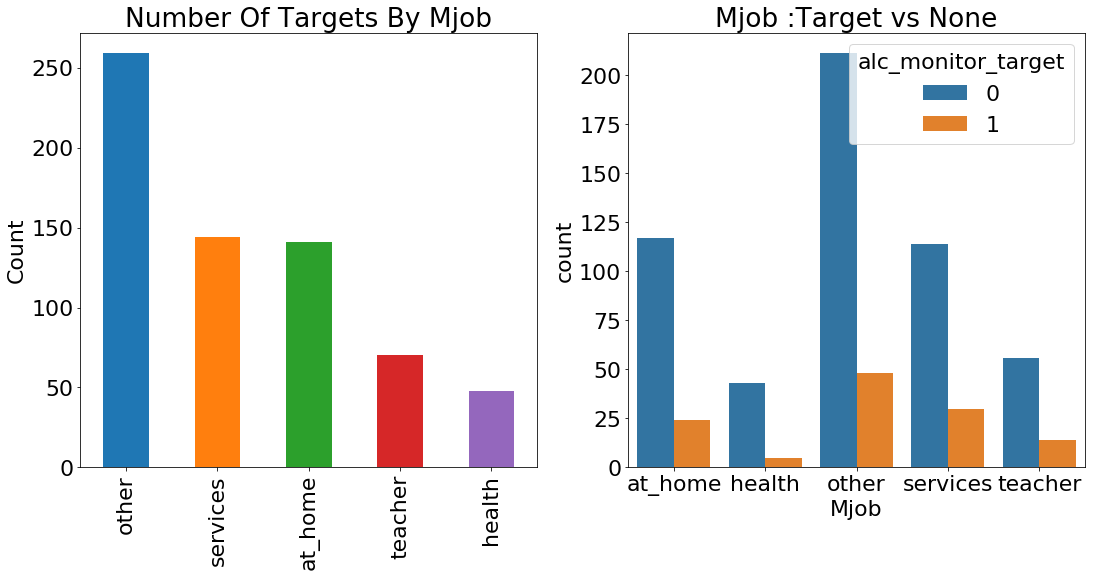

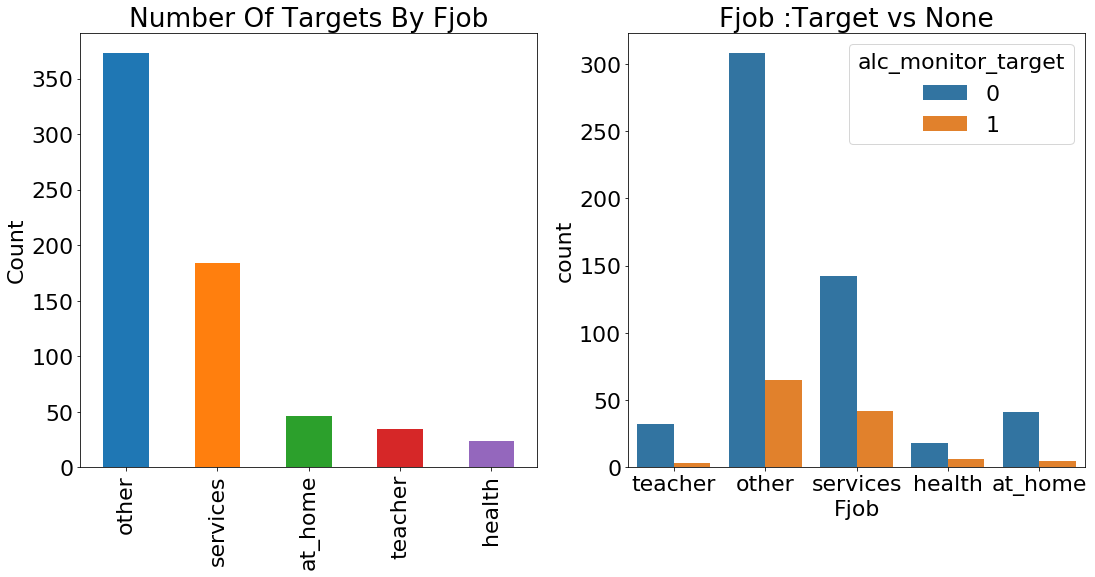

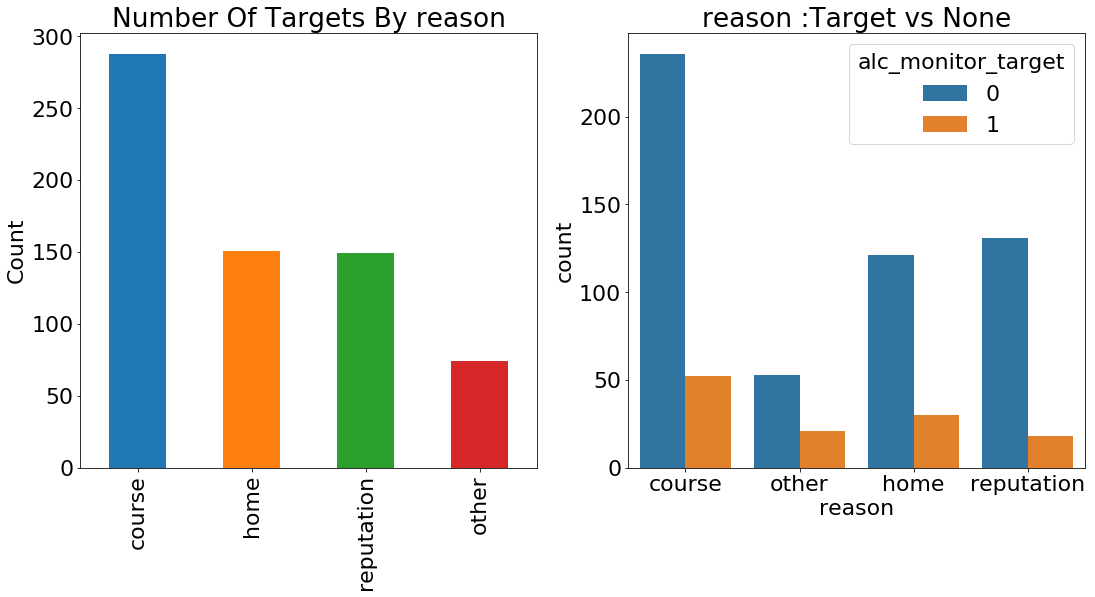

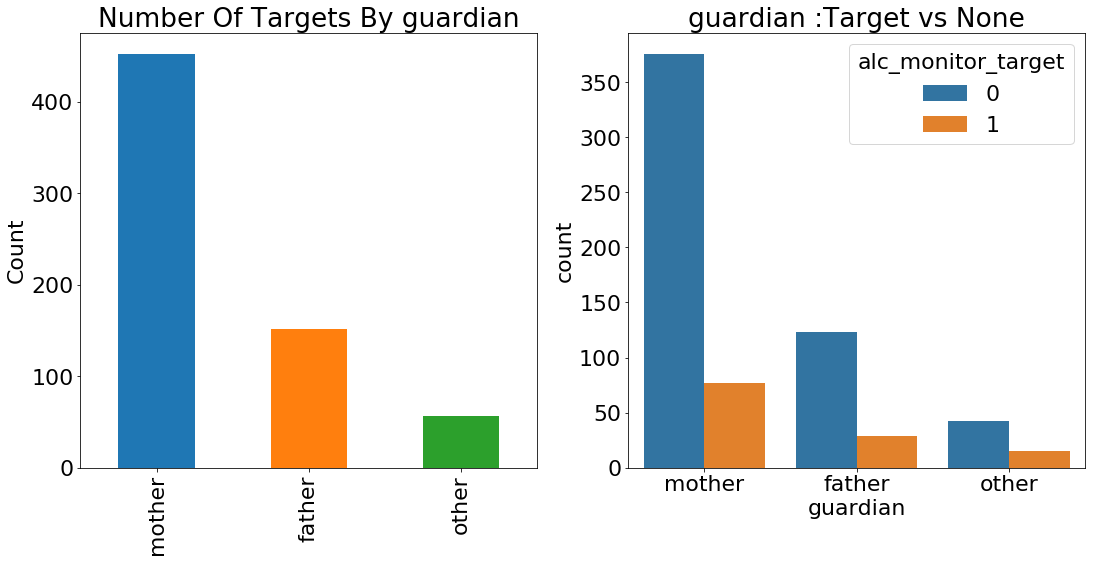

In [151]:
for i in cat_list:
    multi_cat_target_plot('total_data_raw_drop_2', object_name=i)

In [161]:
def factor_plot(filename,x_name=None, y_name=None, hue_name=None):
    
    data = eval(filename)
    sns.factorplot(x = x_name, y = y_name, hue = hue_name,data = data)
    plt.savefig((filename + '_'+x_name + '_'+hue_name + '_factor_plot'), dpi=300)
    plt.show()

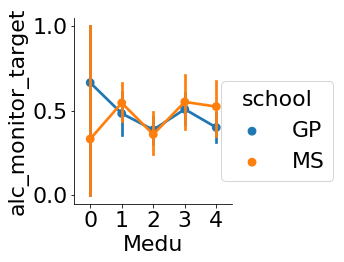

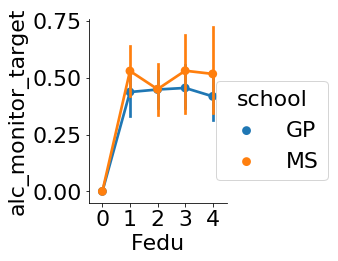

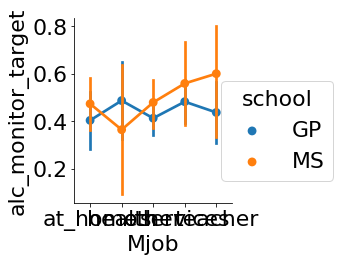

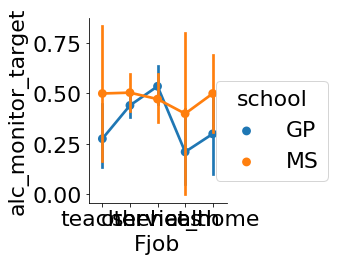

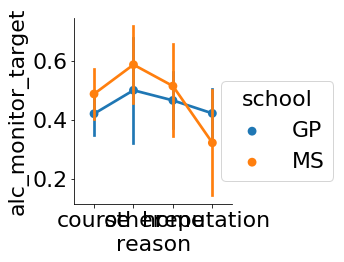

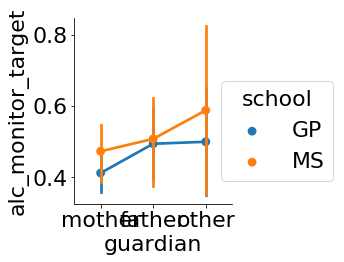

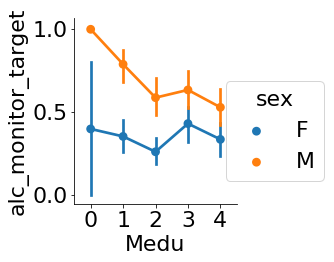

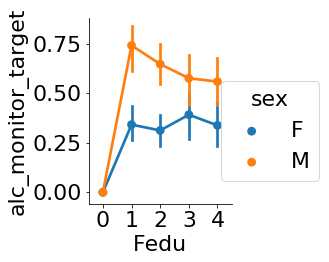

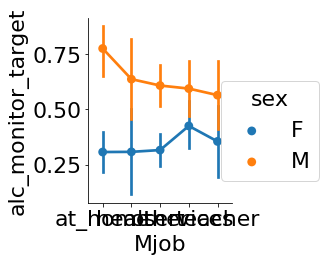

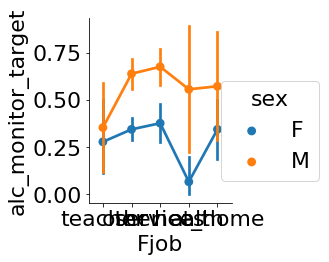

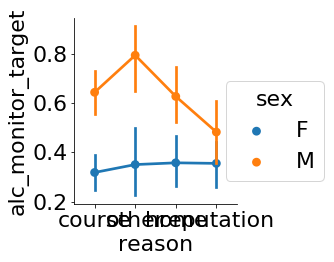

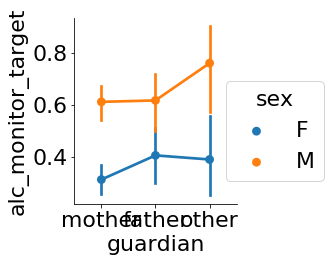

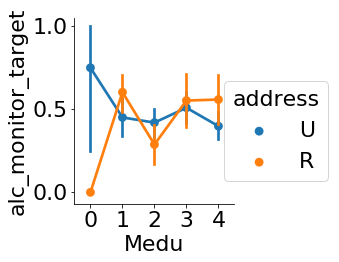

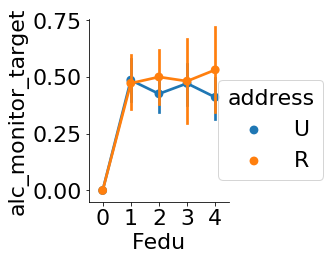

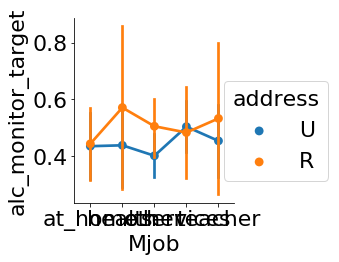

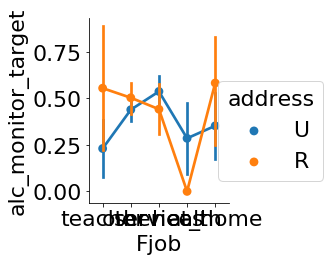

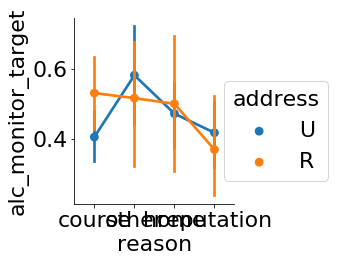

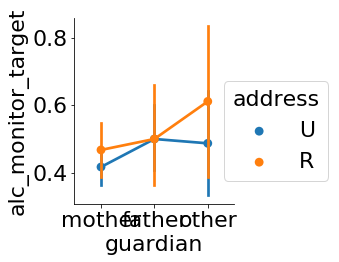

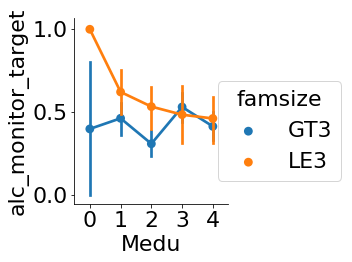

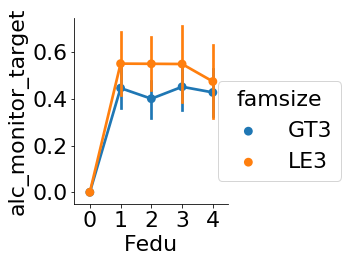

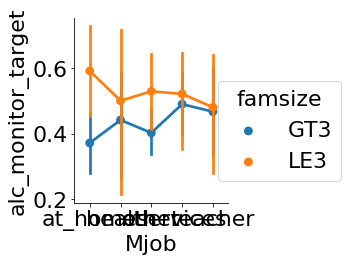

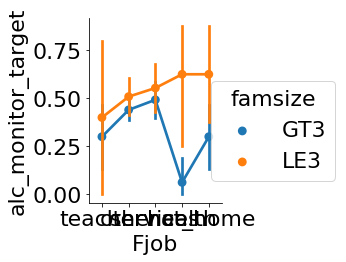

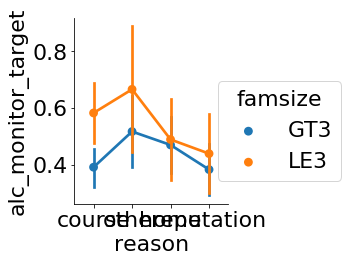

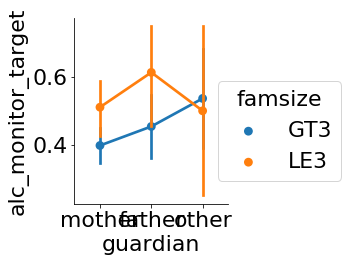

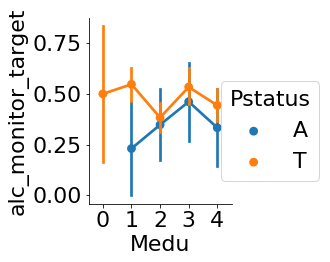

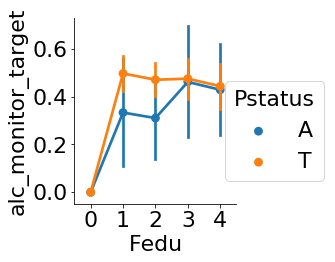

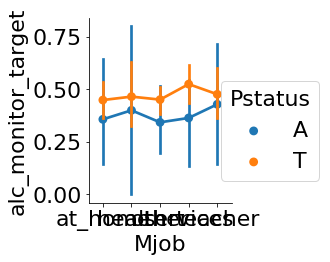

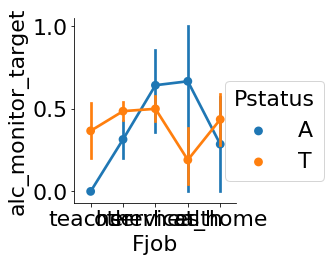

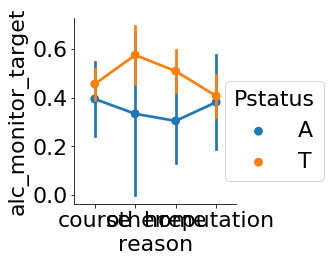

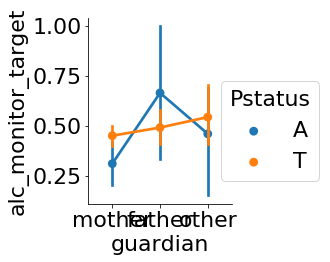

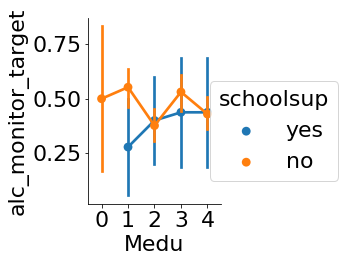

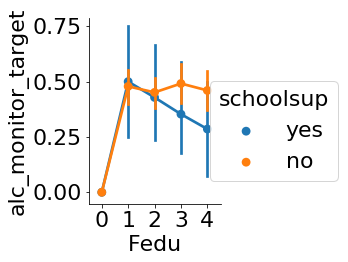

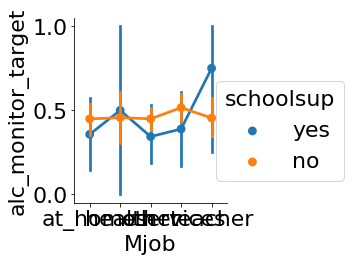

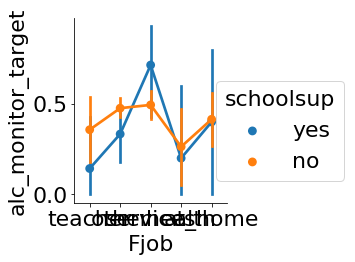

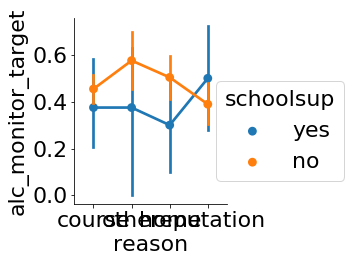

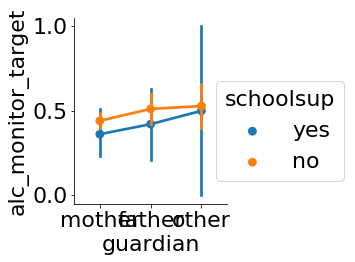

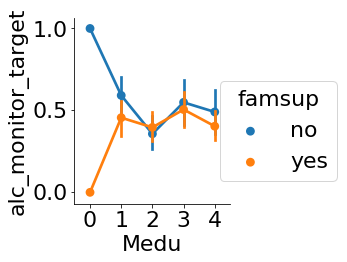

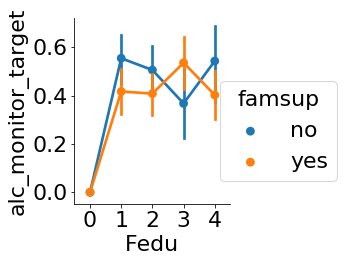

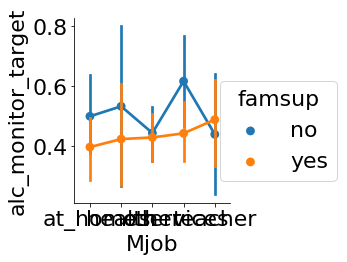

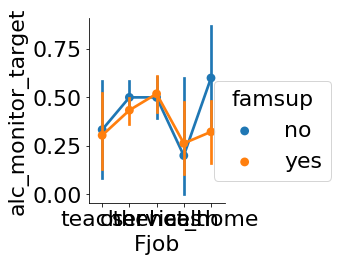

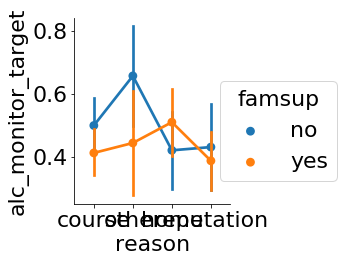

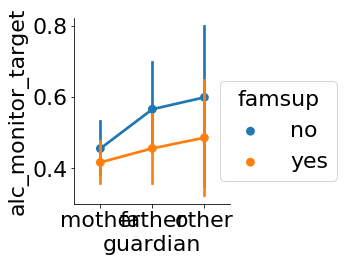

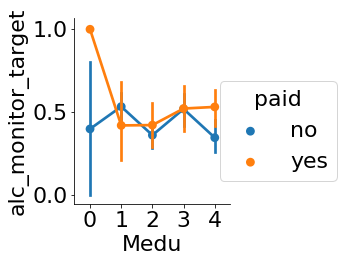

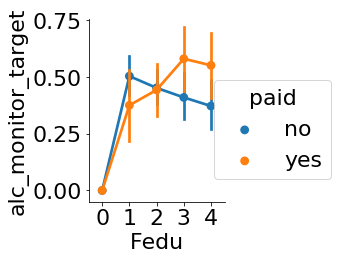

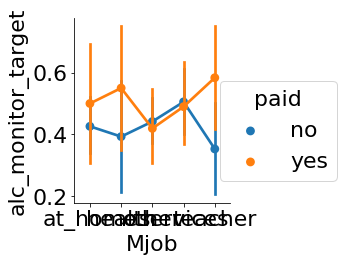

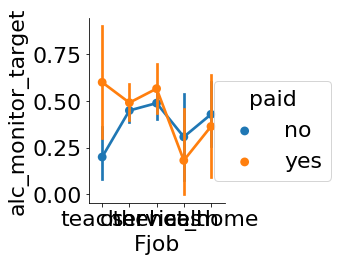

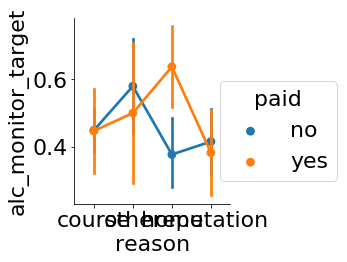

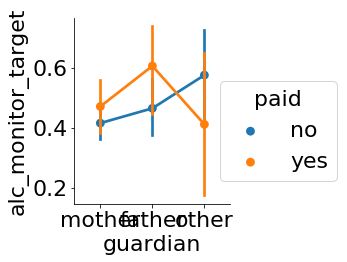

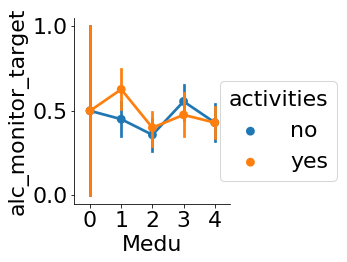

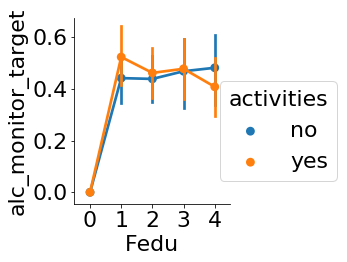

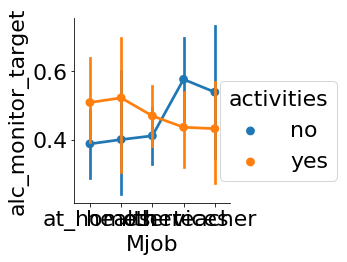

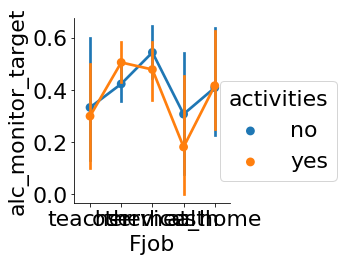

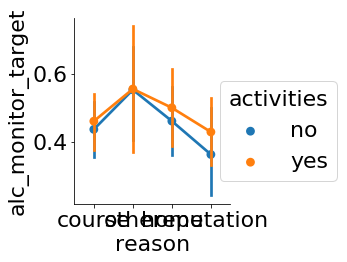

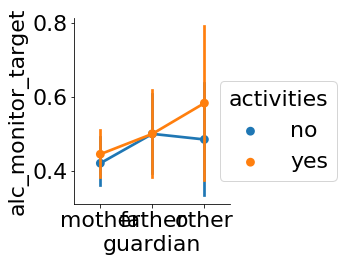

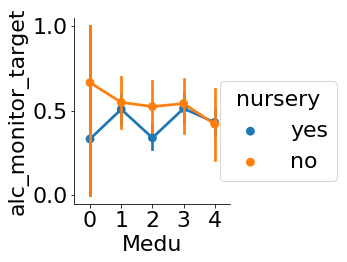

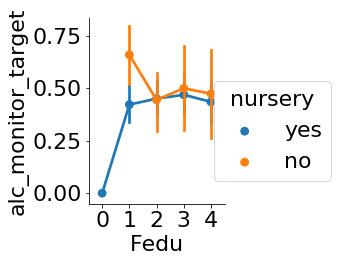

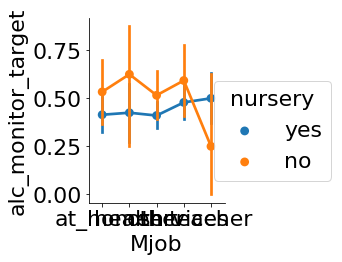

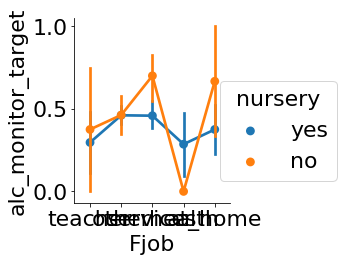

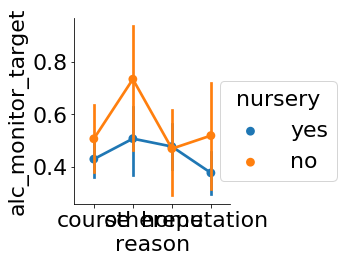

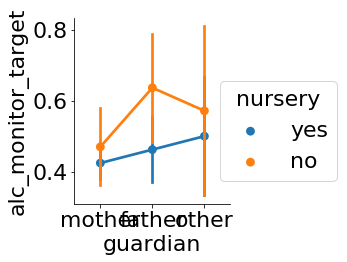

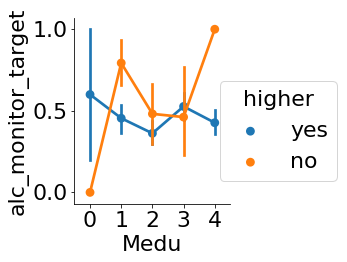

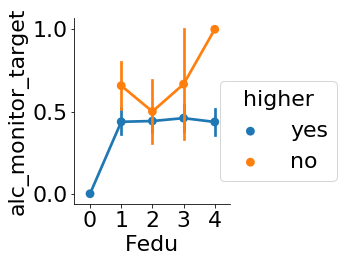

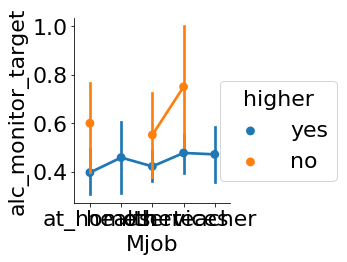

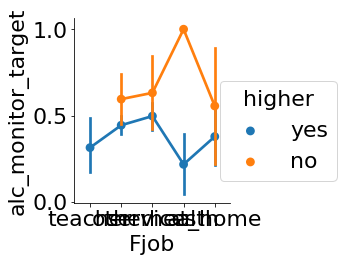

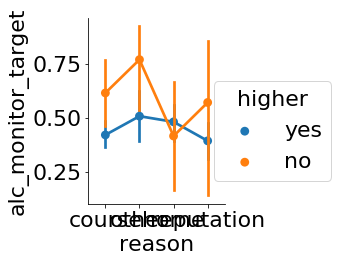

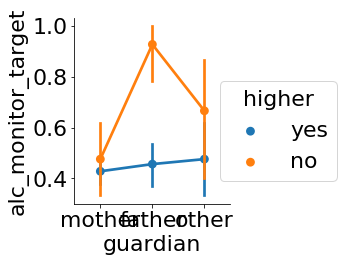

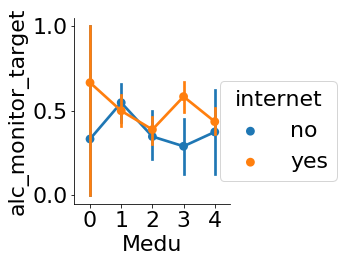

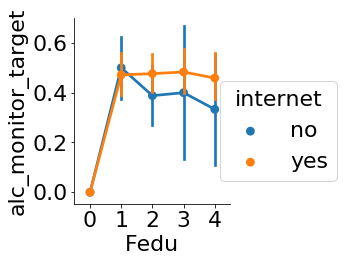

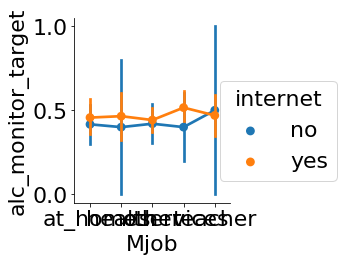

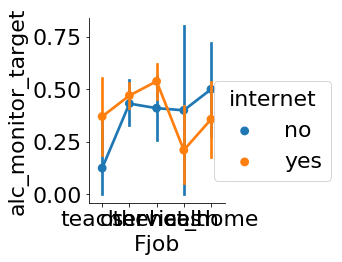

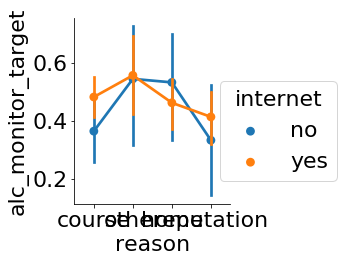

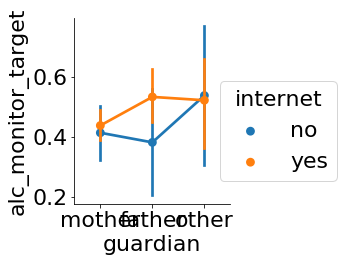

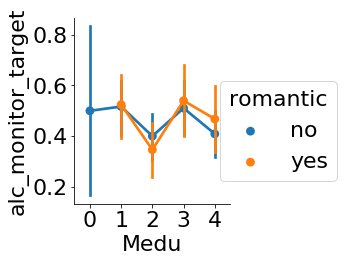

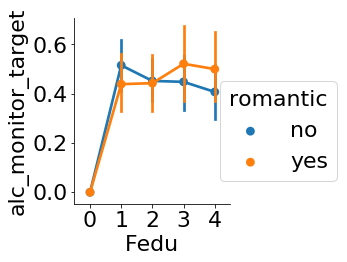

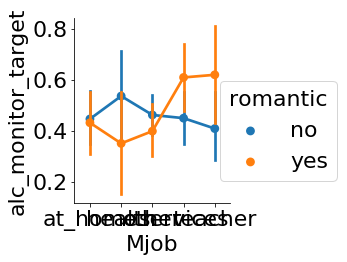

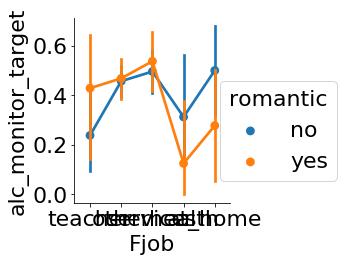

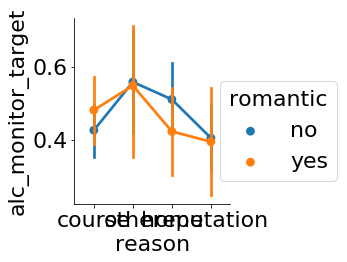

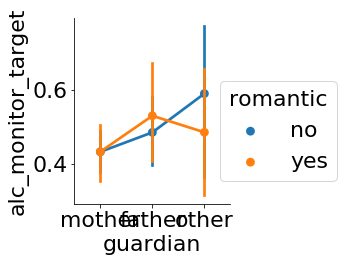

In [162]:
for hue in  binary_list:
    for x in cat_list:
        factor_plot('total_data_raw_drop_1', x_name=x, y_name='alc_monitor_target', hue_name=hue)

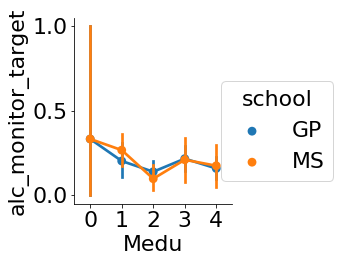

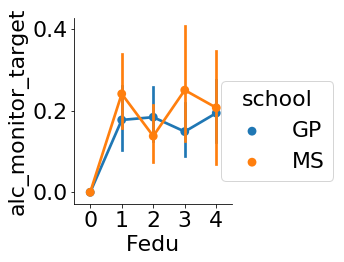

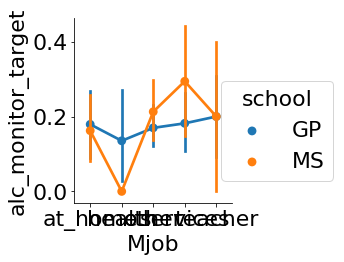

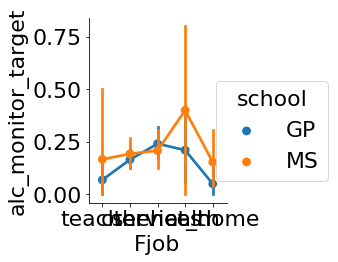

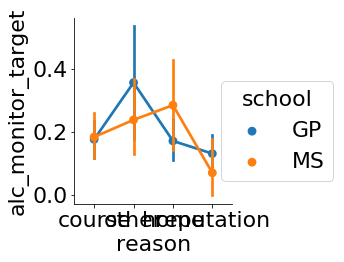

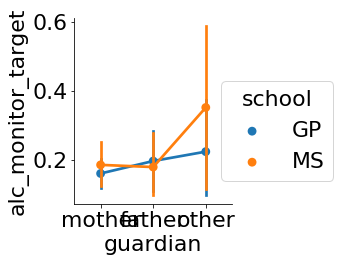

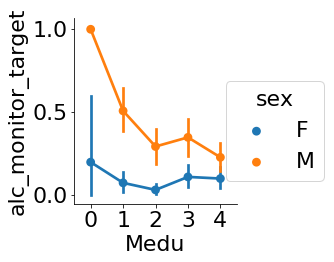

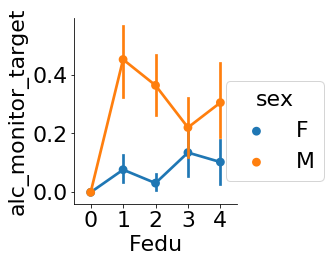

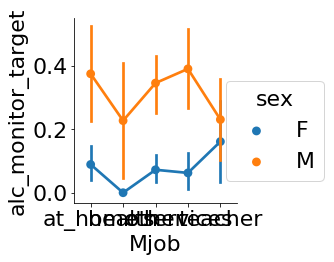

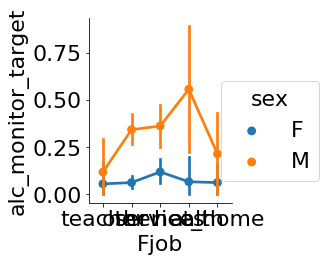

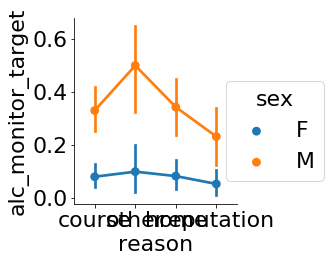

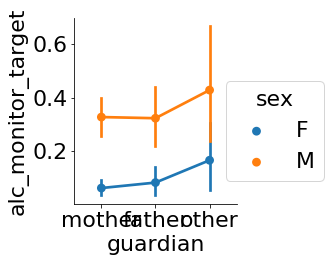

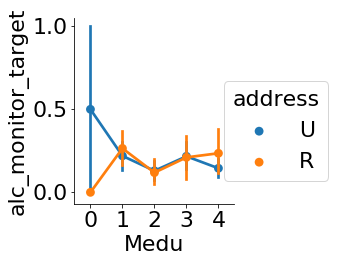

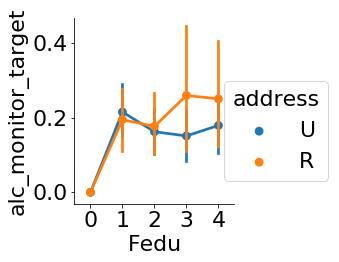

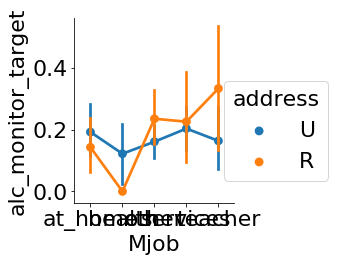

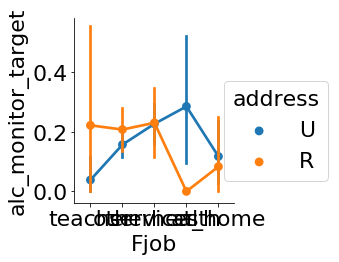

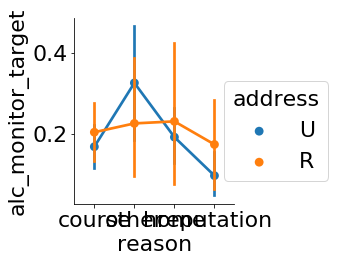

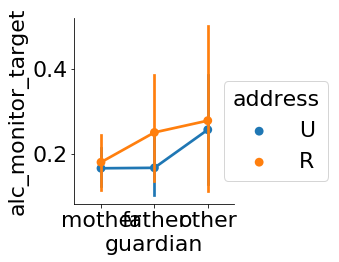

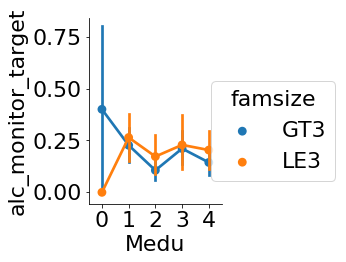

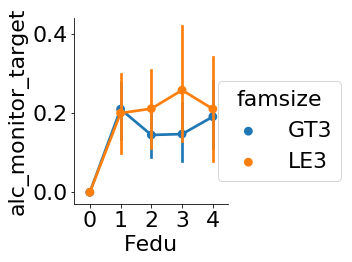

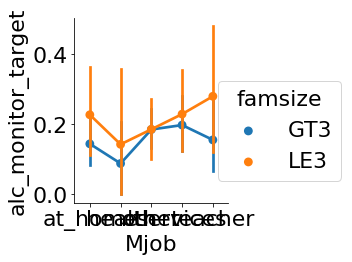

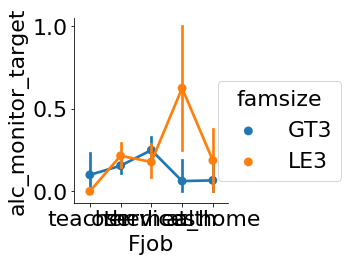

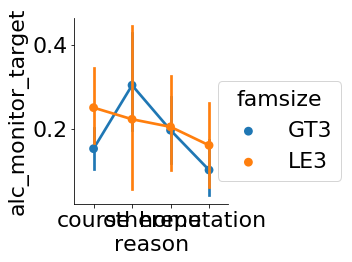

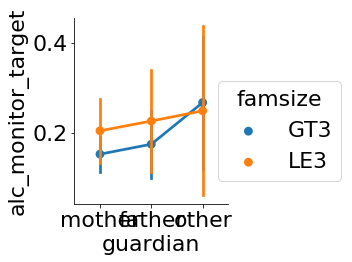

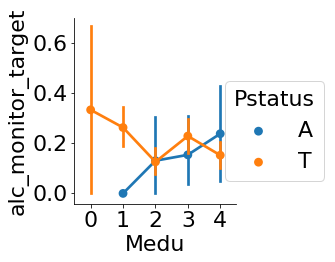

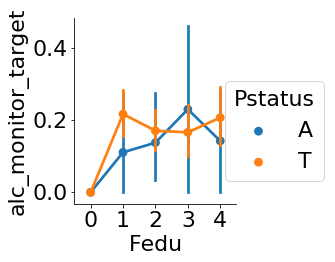

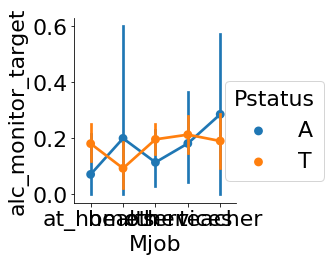

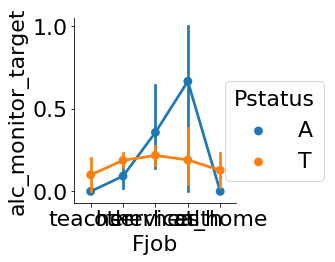

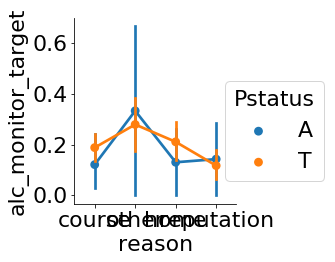

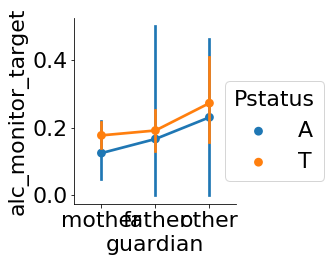

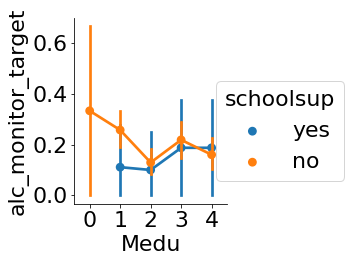

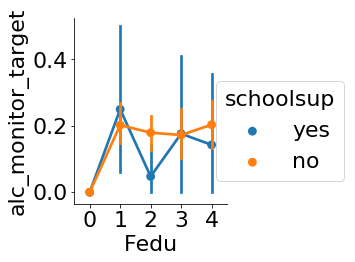

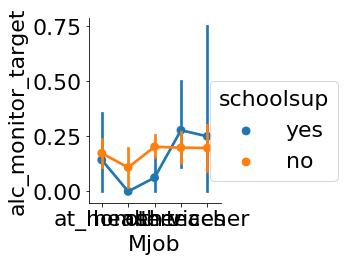

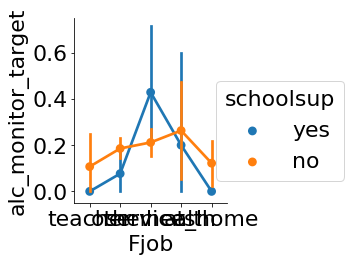

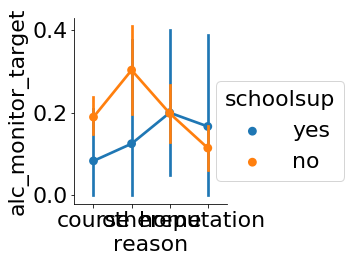

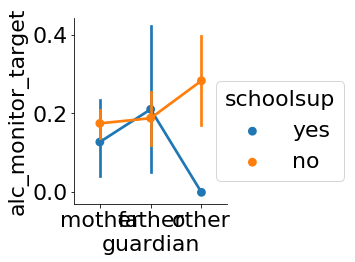

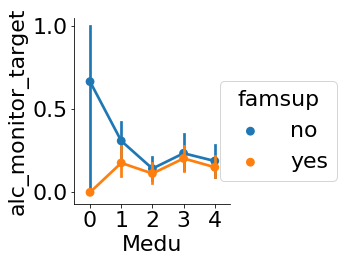

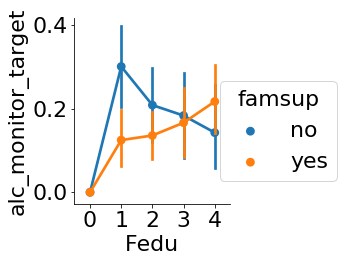

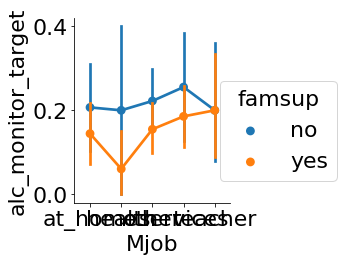

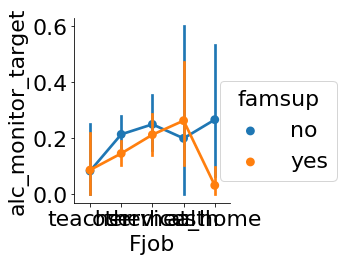

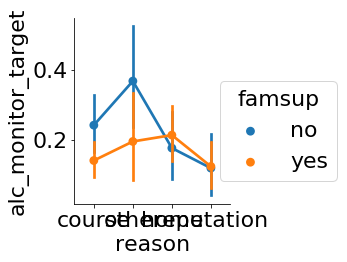

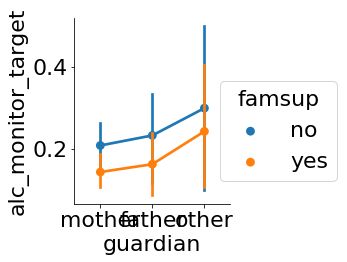

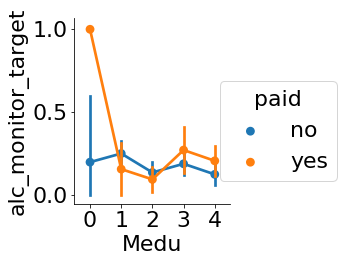

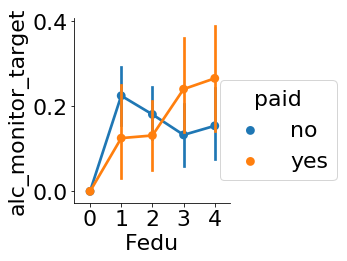

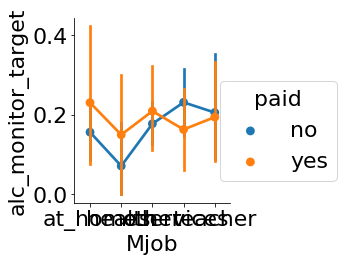

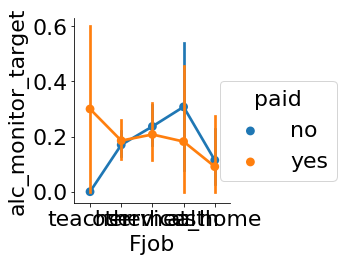

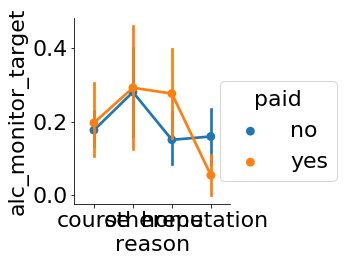

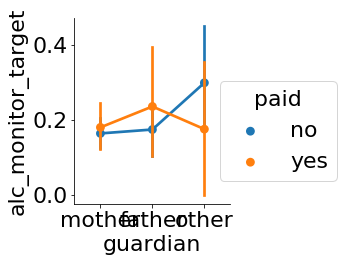

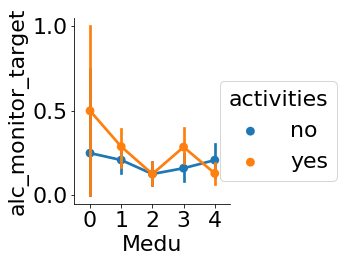

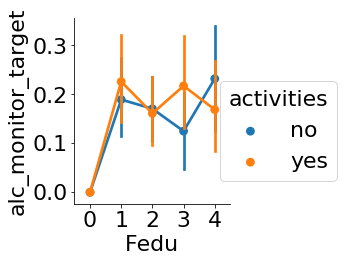

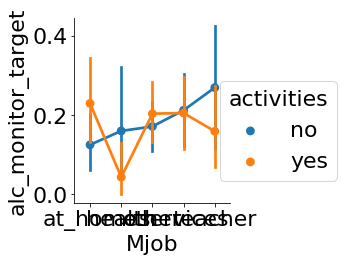

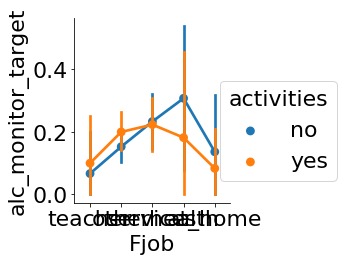

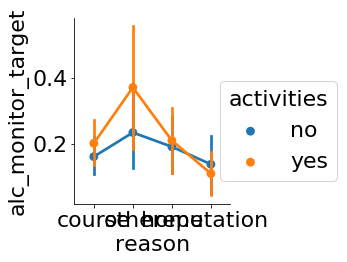

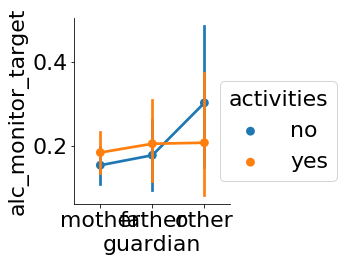

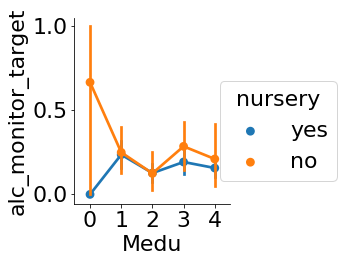

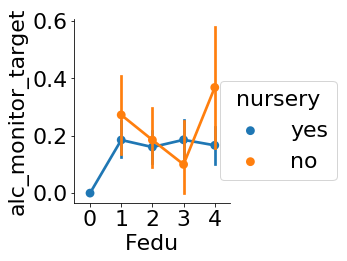

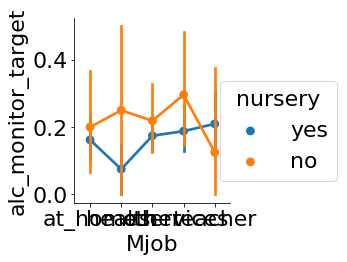

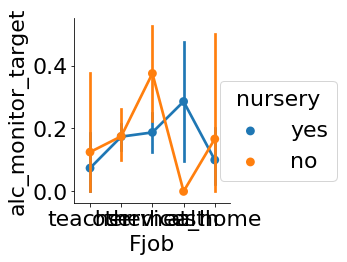

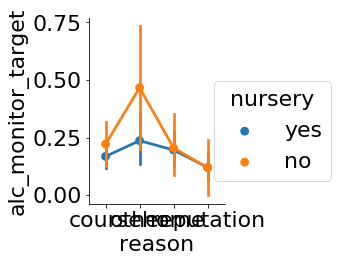

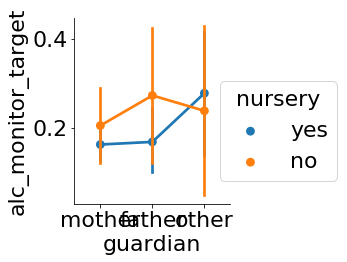

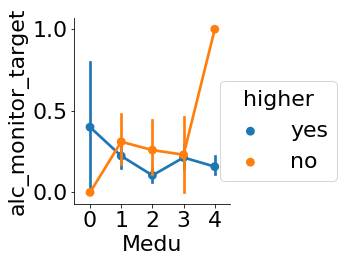

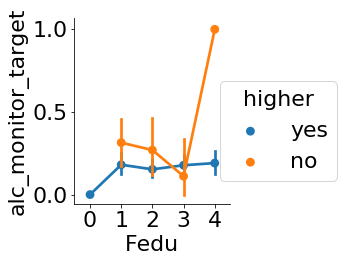

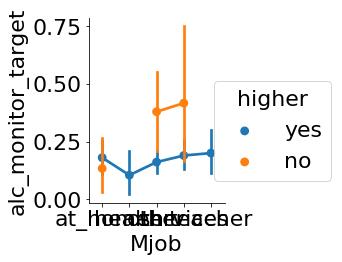

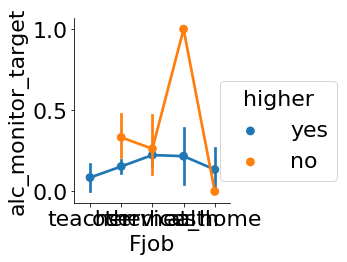

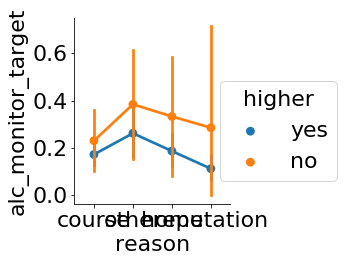

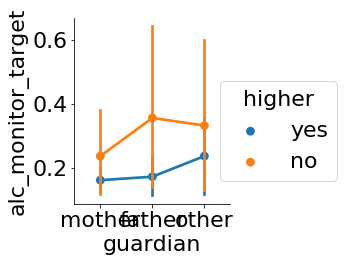

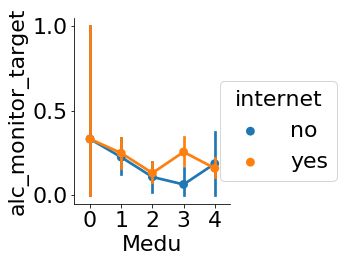

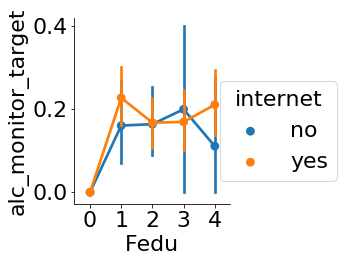

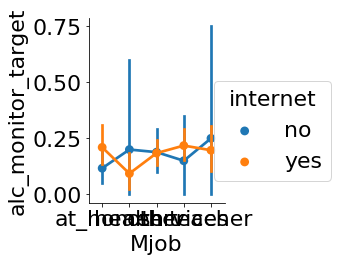

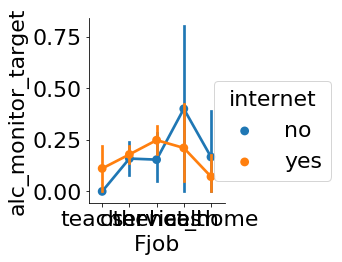

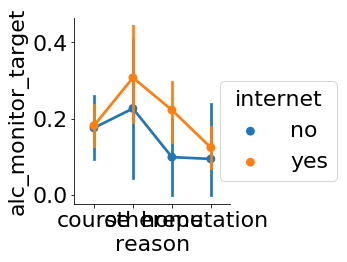

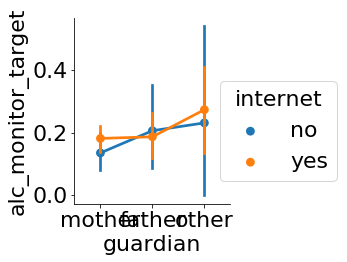

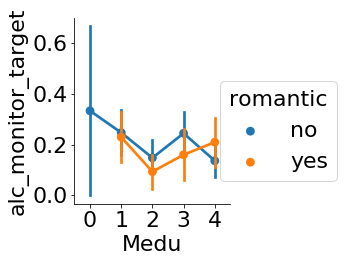

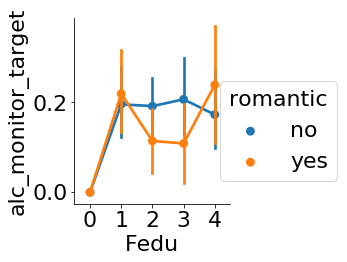

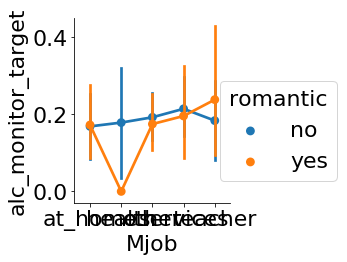

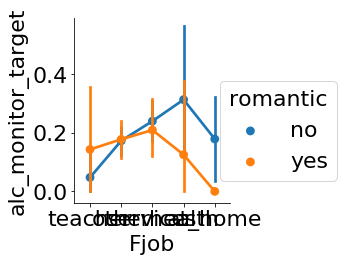

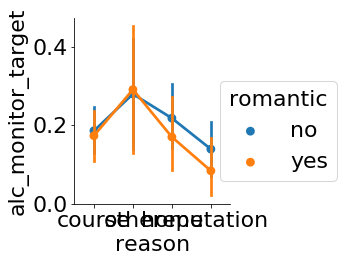

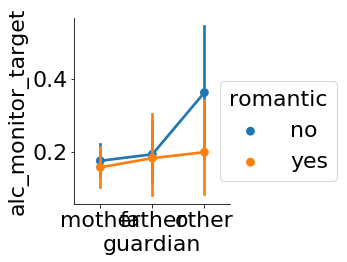

In [163]:
for hue in  binary_list:
    for x in cat_list:
        factor_plot('total_data_raw_drop_2', x_name=x, y_name='alc_monitor_target', hue_name=hue)